# Credit EDA Assignment 

### Problem Statement
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. 
Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The given data contains the information about the loan application at the time of applying for the loan. 
It contains two types of scenarios:

- The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

- All other cases: All other cases when the payment is paid on time.

**Importing the necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',200)

#### 1st dataset - Application Data
'application_data.csv'  contains all the information of the client at the time of application.The data is about whether a client has payment difficulties.


In [2]:
#Reading the dataset of "application_data" into a dataframe
inp0=pd.read_csv("application_data.csv") 

In [3]:
#Routine check for application_data (head, describe, info)
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
# indexing starts from 0-307511
inp0.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
#describe the dataframe
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

Describe function shows that some columns have negative values and outliers which we will treat in the later segments

In [7]:
#checking the shape of the dataframe
inp0.shape

(307511, 122)

In [8]:
#checking the dtypes
inp0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


### DATA CLEANING

### Performing data cleaning on "application_data" dataframe (inp0)

**Checking for missing values**

In [9]:
#Checking for percentage of missing Values in dataframe 'inp0'
100*inp0.isnull().mean().sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

We found that a lot of columns have missing values above 40%, which needs to be dropped off.

In [10]:
#Finding the columns with more than 40% missing values and assigning them into a new list
# Set the cutoff percentage for missing values
cutoff=40
cols_to_drop=list(inp0.columns[100*inp0.isnull().mean()>cutoff])
# Print the list of columns to be dropped
print(cols_to_drop)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [11]:
#dropping the columns with more than 40% missing values
inp0=inp0.drop(cols_to_drop,axis=1)

In [12]:
#checking the shape of the dataframe after dropping the columns
inp0.shape

(307511, 73)

Now, total columns reduced from 122 to 73

In [13]:
#checking again for missing value percentage
check_null=(inp0.isna().sum()/len(inp0)*100).sort_values(ascending = False)
check_null

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

**Inferences:** 
- All the missing values are less than 40% 
- The occupation type has the highest missing values compared to the rest.

**Treating the missing values one by one**

In [14]:
#Replacing the missing values in OCCUPATION_TYPE
inp0.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

Since the "OCUPATION_TYPE" column is a categorical column, we can replace the values with mode

In [15]:
#Replacing the missing values with mode in OCUPATION_TYPE column
inp0.OCCUPATION_TYPE.mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

In [16]:
inp0['OCCUPATION_TYPE'].isna().values.any()

True

In [17]:
inp0['OCCUPATION_TYPE']=inp0['OCCUPATION_TYPE'].fillna(inp0['OCCUPATION_TYPE'].mode()[0])

In [18]:
inp0['OCCUPATION_TYPE'].isna().values.any()

False

Concludes that all the missing values are replaced with mode

In [19]:
#Checking missing values in EXT_SOURCE_3
inp0["EXT_SOURCE_3"].isnull().mean()

0.19825307062186392

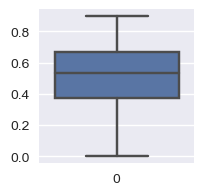

In [23]:
#checking outliers 
plt.figure(figsize=(2,2))
plt.style.use('seaborn-v0_8')
sns.boxplot(inp0['EXT_SOURCE_3'])
plt.show()

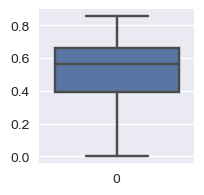

In [24]:
plt.figure(figsize=(2,2))
sns.boxplot(inp0['EXT_SOURCE_2'])
plt.show()

Clearly there are no outiers in the EXT_SOURCE_3 and EXT_SOURCE_2


In [25]:
# Replacing the missing values in EXT_SOURCE_3 column by mean
mean1=round(inp0['EXT_SOURCE_3'].mean(),2)
inp0['EXT_SOURCE_3']=inp0['EXT_SOURCE_2'].fillna(mean1)

In [26]:
inp0['EXT_SOURCE_3'].isnull().mean()

0.0

In [27]:
# Replacing the missing values in EXT_SOURCE_2 column by mean

mean2=round(inp0['EXT_SOURCE_2'].mean(),2)
inp0['EXT_SOURCE_2']=inp0['EXT_SOURCE_2'].fillna(mean2)

In [28]:
inp0["EXT_SOURCE_2"].isnull().mean()

0.0

In [29]:
#Checking and replacing the missing values in AMT_ANNUITY
inp0['AMT_ANNUITY'].isnull().mean()

3.9022994299390916e-05

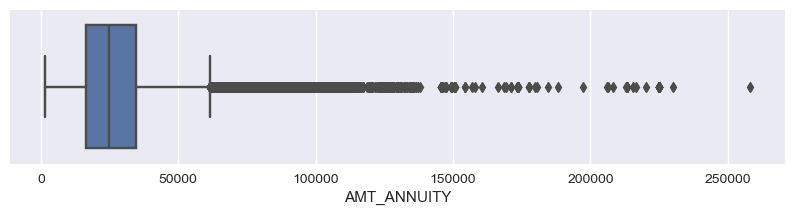

In [30]:
#checking for outliers
plt.figure(figsize=(10,2))
sns.boxplot(x=inp0['AMT_ANNUITY'])
plt.show()

The above boxplot shows a lot of outliers are present in the AMT_ANNUITY column, so going to use median

In [32]:
inp0.AMT_ANNUITY.median()

24903.0

In [33]:
#Replaced missing values with median
inp0['AMT_ANNUITY']=inp0['AMT_ANNUITY'].fillna(inp0['AMT_ANNUITY'].median())

In [34]:
inp0['AMT_ANNUITY'].isnull().mean()

0.0

In [35]:
#Checking and Replacing the missing values in AMT_GOODS_PRICE
inp0.AMT_GOODS_PRICE.isna().value_counts()

AMT_GOODS_PRICE
False    307233
True        278
Name: count, dtype: int64

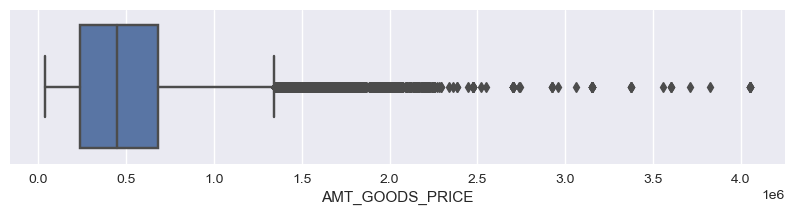

In [36]:
#checking for outliers
plt.figure(figsize=(10,2))
sns.boxplot(x=inp0['AMT_GOODS_PRICE'])
plt.show()

In [37]:
inp0.AMT_GOODS_PRICE.median()

450000.0

In [38]:
#Replaced missing values with median
inp0['AMT_GOODS_PRICE']=inp0['AMT_GOODS_PRICE'].fillna(inp0['AMT_GOODS_PRICE'].median())

In [39]:
# checking if there is any negative values in columns
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143832e-01,5.143832e-01,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908551e-01,1.908551e-01,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,8.173617e-08,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.0

- It shows there are some columns with negative values. 

In [40]:
# negative values are in days variables
print(inp0['DAYS_BIRTH'].unique())
print(inp0['DAYS_EMPLOYED'].unique())
print(inp0['DAYS_REGISTRATION'].unique())
print(inp0['DAYS_ID_PUBLISH'].unique())
print(inp0['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [41]:
#converting negative values to positive using abs
inp0['DAYS_BIRTH']=abs(inp0['DAYS_BIRTH'])
inp0['DAYS_EMPLOYED']=abs(inp0['DAYS_EMPLOYED'])
inp0['DAYS_REGISTRATION']=abs(inp0['DAYS_REGISTRATION'])
inp0['DAYS_ID_PUBLISH']=abs(inp0['DAYS_ID_PUBLISH'])
inp0['DAYS_LAST_PHONE_CHANGE']=abs(inp0['DAYS_LAST_PHONE_CHANGE'])

In [42]:
#Checking the negative values again !
print(inp0['DAYS_BIRTH'].unique())
print(inp0['DAYS_EMPLOYED'].unique())
print(inp0['DAYS_REGISTRATION'].unique())
print(inp0['DAYS_ID_PUBLISH'].unique())
print(inp0['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [43]:
#checking CODE_GENDER column
inp0.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

**Replacing the missing values with F as count of female is more than males**

In [44]:
inp0['CODE_GENDER']=inp0['CODE_GENDER'].replace('XNA','F')
inp0.CODE_GENDER.value_counts() 

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [45]:
# Replacing XNA with NaN
inp0 = inp0.replace('XNA',np.NaN)

In [46]:
#checking columns with unique values less than or equal to 30
sorted(inp0.columns[inp0.isnull().mean()<=0.30])

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_OWN_CAR',

In [47]:
#Replacing some columns with mode as they are categorical columns
inp0['AMT_REQ_CREDIT_BUREAU_DAY']=inp0['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(inp0['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])
inp0['AMT_REQ_CREDIT_BUREAU_HOUR']=inp0['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(inp0['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])
inp0['AMT_REQ_CREDIT_BUREAU_MON']=inp0['AMT_REQ_CREDIT_BUREAU_MON'].fillna(inp0['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])
inp0['AMT_REQ_CREDIT_BUREAU_QRT']=inp0['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(inp0['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])
inp0['AMT_REQ_CREDIT_BUREAU_WEEK']=inp0['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(inp0['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])
inp0['AMT_REQ_CREDIT_BUREAU_YEAR']=inp0['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(inp0['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])
inp0['NAME_TYPE_SUITE']=inp0['NAME_TYPE_SUITE'].fillna(inp0['NAME_TYPE_SUITE'].mode()[0])
inp0['CNT_CHILDREN']=inp0['CNT_CHILDREN'].fillna(inp0['CNT_CHILDREN'].mode()[0])
inp0['CNT_FAM_MEMBERS']=inp0['CNT_FAM_MEMBERS'].fillna(inp0['CNT_FAM_MEMBERS'].mode()[0])
inp0['ORGANIZATION_TYPE']=inp0['ORGANIZATION_TYPE'].fillna(inp0['ORGANIZATION_TYPE'].mode()[0])


In [48]:
#checking columns with unique values more than 35
sorted(inp0.columns[inp0.nunique()>30])

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'ORGANIZATION_TYPE',
 'REGION_POPULATION_RELATIVE',
 'SK_ID_CURR']

Columnns with less than 30 unique values as categorical and more than 30 unique values as continuous in this analysis

In [49]:
#nearly most of the columns are treated for missing values
100*inp0.isnull().mean()

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.000000
NAME_TYPE_SUITE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [50]:
#treating the remaining columns with missing values
inp0['OBS_30_CNT_SOCIAL_CIRCLE']=inp0['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(inp0['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0])
inp0['OBS_60_CNT_SOCIAL_CIRCLE']=inp0['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(inp0['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])
inp0['DEF_30_CNT_SOCIAL_CIRCLE']=inp0['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(inp0['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0])
inp0['DEF_60_CNT_SOCIAL_CIRCLE']=inp0['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(inp0['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])
inp0['DAYS_LAST_PHONE_CHANGE']=inp0['DAYS_LAST_PHONE_CHANGE'].fillna(inp0['DAYS_LAST_PHONE_CHANGE'].mode()[0])

### Binning
- Binning AMT_INCOME_TOTAL into AMT_INCOME_RANGE and AMT_CREDIT into AMT_CREDIT_RANGE

In [51]:
# Creating bins for income amount
inp0['AMT_INCOME_TOTAL'].unique()

array([202500. , 270000. ,  67500. , ...,  96768. , 546250.5, 113062.5])

In [52]:
#binning and divided the variables in to there quantile range
inp0['AMT_INCOME_RANGE'] = pd.qcut(inp0.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MED", 'HIGH', 'VERY_HIGH'])
inp0['AMT_INCOME_RANGE'].head(10)

0          MED
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5     VERY_LOW
6          MED
7    VERY_HIGH
8          LOW
9          LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MED' < 'HIGH' < 'VERY_HIGH']

In [53]:
inp0['AMT_CREDIT_RANGE'] = pd.qcut(inp0.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MED", 'HIGH', 'VERY_HIGH'])
inp0['AMT_CREDIT_RANGE'].head(10)

0          LOW
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5          LOW
6    VERY_HIGH
7    VERY_HIGH
8         HIGH
9          LOW
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MED' < 'HIGH' < 'VERY_HIGH']

In [54]:
#finding unique values in DAYS_BIRTH
inp0['DAYS_BIRTH'].unique() 

array([ 9461, 16765, 19046, ...,  7951,  7857, 25061], dtype=int64)

In [55]:
#treating the DAYS_BIRTH column dtype
inp0.DAYS_BIRTH.dtypes

dtype('int64')

In [56]:
#Converting days into years
inp0["DAYS_BIRTH"]= (inp0['DAYS_BIRTH']/365).astype(int)
inp0["DAYS_BIRTH"].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [57]:
#binning the DAYS_BIRTH column into 4 categories
inp0['DAYS_BIRTH_new']=pd.cut(inp0['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['TEEN','YOUNG', 'MID_AGE', 'SR_CITIZEN'])
inp0['DAYS_BIRTH_new'].value_counts()

DAYS_BIRTH_new
MID_AGE       185900
YOUNG          75925
SR_CITIZEN     29368
TEEN           16318
Name: count, dtype: int64

In [58]:
#Checking the data imbalance percentage
print(100*inp0.TARGET.value_counts()/len(inp0))

TARGET
0    91.927118
1     8.072882
Name: count, dtype: float64


**Since the data is imbalanced,as there exists 91.927118% of "not default" and 8.072882% of "default" customers.**
- We divide the dataset into two datasets as Defaulters and Non_Defaulters

In [59]:
#Creating two dataset of target=1(client with payment difficulties) and target=0(all other)
Defaulters = inp0.loc[inp0['TARGET']==0]
Non_Defaulters = inp0.loc[inp0['TARGET']==1]

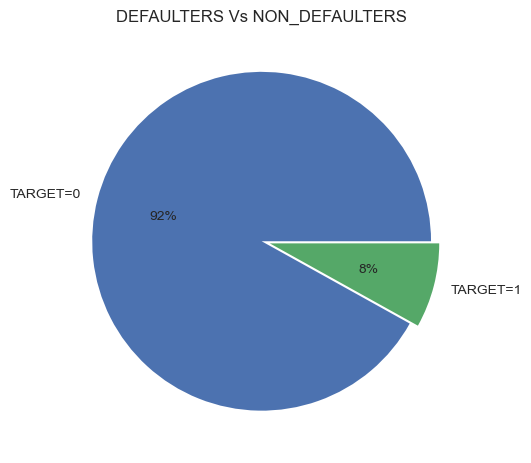

In [60]:
plt.pie(inp0['TARGET'].value_counts(normalize=True)*100,labels=['TARGET=0','TARGET=1'],explode=(0,0.05),autopct='%1.f%%')
plt.title('DEFAULTERS Vs NON_DEFAULTERS', fontsize =12)
plt.show()

More than 92% of people are Non-Defaulters as opposed to 8% Defaulters.

#### Checking for outliers for atleast 5 variables (for numerical columns)

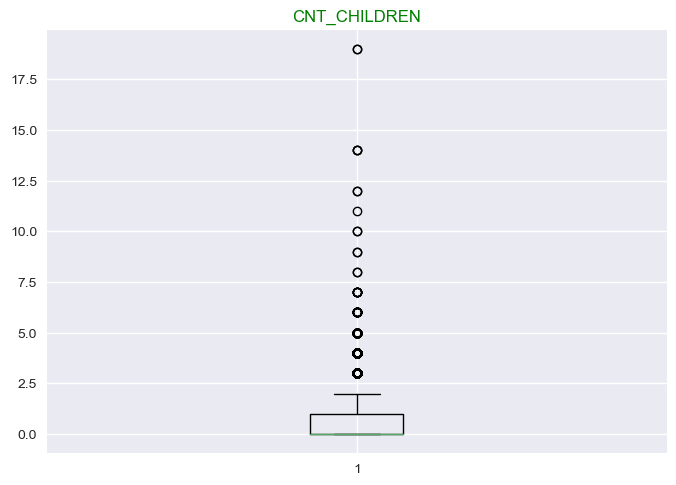

In [61]:
plt.style.use('seaborn-v0_8')
plt.boxplot(inp0['CNT_CHILDREN'])
plt.title('CNT_CHILDREN',color='Green')
plt.show()

In [62]:
# From box plot, we see that there exists values which are above upper whisker(maximum) and considered to be as outliers. 
q1 = inp0['CNT_CHILDREN'].quantile(0.25)
q3 = inp0['CNT_CHILDREN'].quantile(0.75)
iqr = q3 - q1
lower=(q1 - 1.5 * iqr)
upper=(q3 + 1.5 * iqr)
print("The values greater than {} are considered to be outliers,since count of children cannot be in decimals we can conclude that count greater than 3 can be an outlier".format(upper))

The values greater than 2.5 are considered to be outliers,since count of children cannot be in decimals we can conclude that count greater than 3 can be an outlier


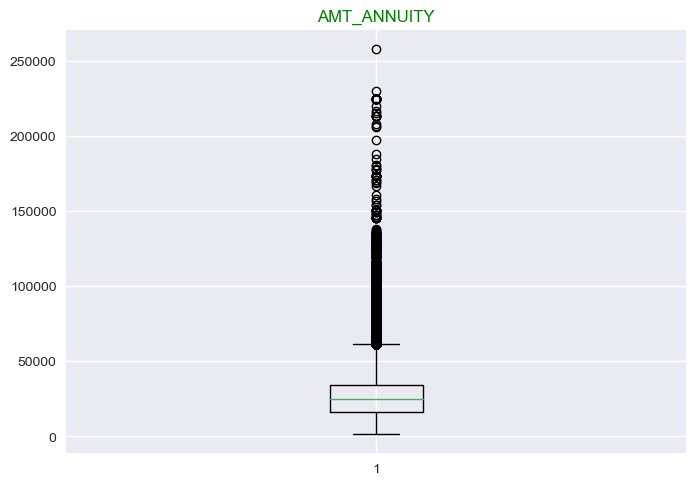

The values greater than 61704.0 are considered to be outliers


In [63]:
plt.style.use('seaborn-v0_8')
plt.boxplot(inp0['AMT_ANNUITY'])
plt.title('AMT_ANNUITY',color='Green')
plt.show()
q1 = inp0['AMT_ANNUITY'].quantile(0.25)
q3 = inp0['AMT_ANNUITY'].quantile(0.75)
iqr = q3 - q1
lower=(q1 - 1.5 * iqr)
upper=(q3 + 1.5 * iqr)
print("The values greater than {} are considered to be outliers".format(upper))

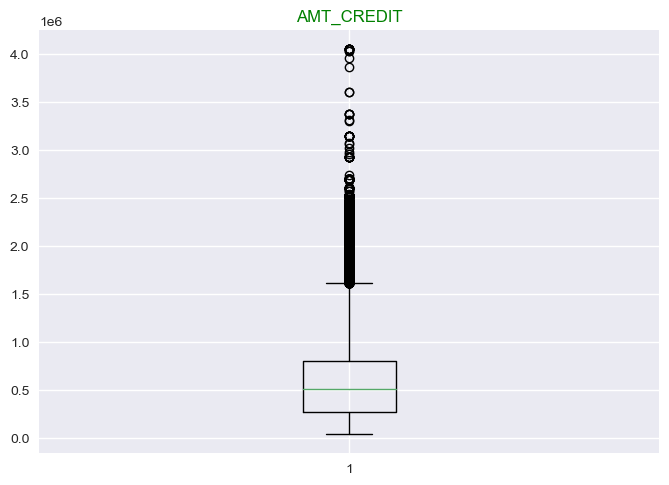

The values greater than 1616625.0 are considered to be outliers


In [64]:
plt.style.use('seaborn-v0_8')
plt.boxplot(inp0['AMT_CREDIT'])
plt.title('AMT_CREDIT',color='Green')
plt.show()
q1 = inp0['AMT_CREDIT'].quantile(0.25)
q3 = inp0['AMT_CREDIT'].quantile(0.75)
iqr = q3 - q1
lower=(q1 - 1.5 * iqr)
upper=(q3 + 1.5 * iqr)
print("The values greater than {} are considered to be outliers".format(upper))

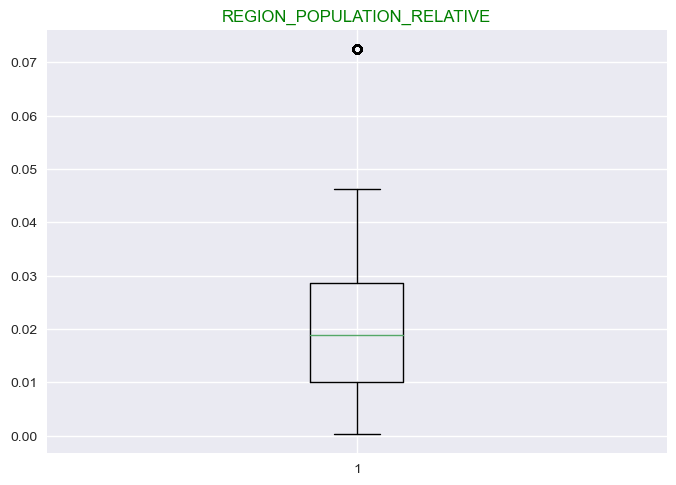

The values greater than 0.056648500000000004 are considered to be outliers


In [65]:
plt.boxplot(inp0['REGION_POPULATION_RELATIVE'])
plt.title('REGION_POPULATION_RELATIVE',color='Green')
plt.show()
q1 = inp0['REGION_POPULATION_RELATIVE'].quantile(0.25)
q3 = inp0['REGION_POPULATION_RELATIVE'].quantile(0.75)
iqr = q3 - q1
lower=(q1 - 1.5 * iqr)
upper=(q3 + 1.5 * iqr)
print("The values greater than {} are considered to be outliers".format(upper))

### Univariate Analysis

Performing analysis for one column at a time

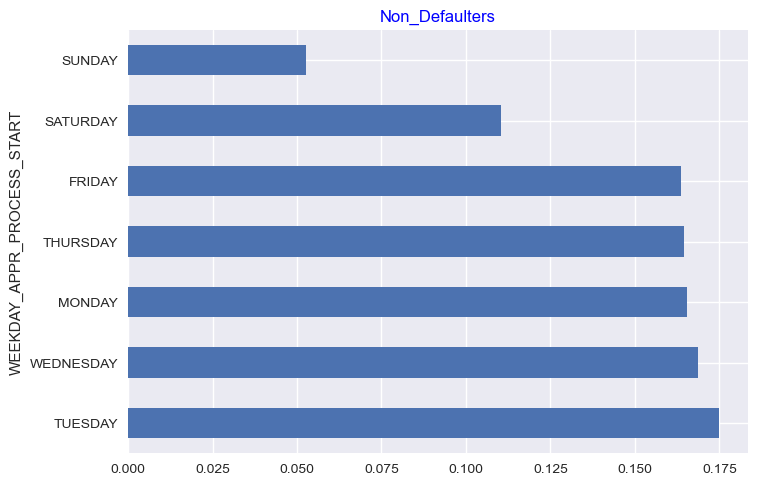

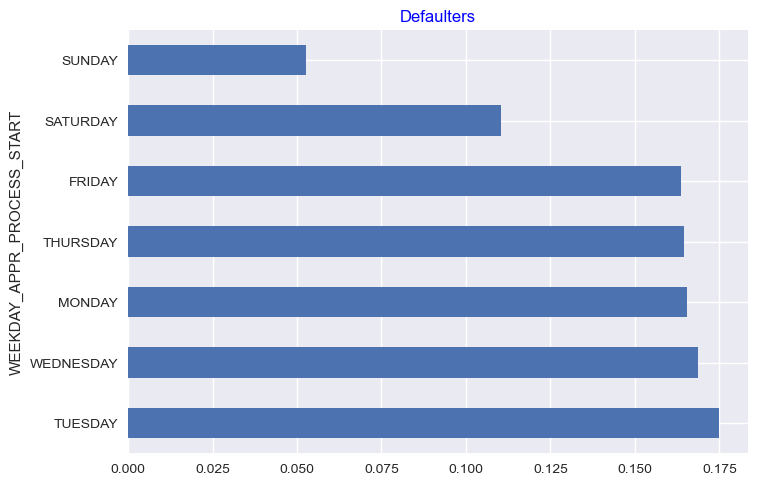

In [66]:
#Univariate analysis for categorical variables for both Defaulters and Non_Defaulters
#WEEKDAY_APPR_PROCESS_START
plt.style.use('seaborn-v0_8')
Defaulters.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.barh()
plt.title('Non_Defaulters', color='Blue')
plt.show()
Defaulters.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.barh()
plt.title('Defaulters', color='Blue')
plt.show()


**Insights**
- From the graph we can conclude that application starting processes are less on saturday and sunday for both Defaulters and Non_Defaulters

**Insights**

- Laborers are the highest number of population in both defaulter and non-defaulters.
- Male Laborers are more in count of defaulter than non-defaulters.
- Female Laborers are more in count of non-defaulters than defaulters.
- Female category better than Male for repaying loans on time.

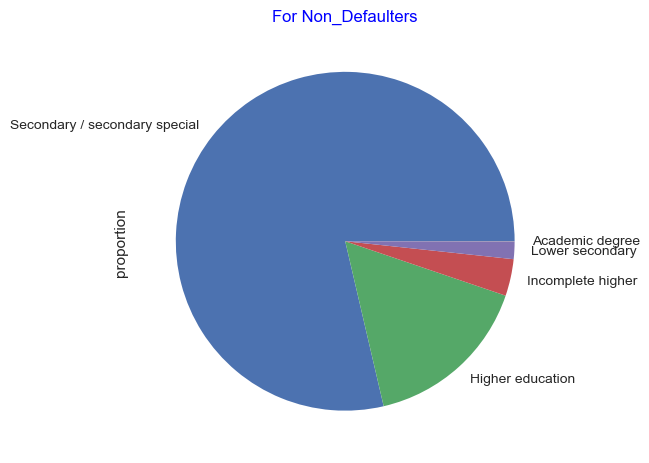

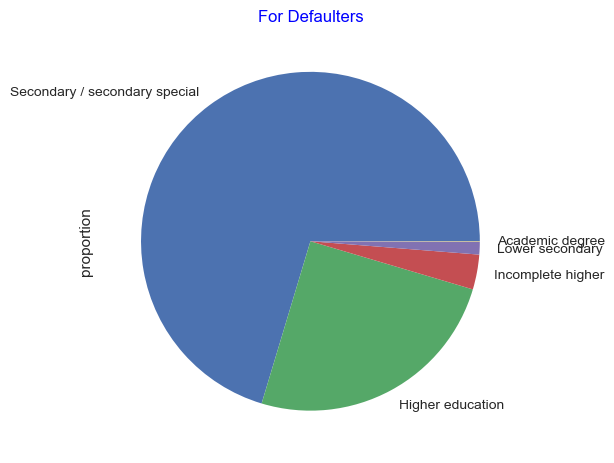

In [67]:
#NAME_EDUCATION_TYPE
Non_Defaulters.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.style.use('seaborn-v0_8')
plt.title("For Non_Defaulters", color='blue')
plt.show()
Defaulters.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.title("For Defaulters",color='blue')
plt.show()

**Insights**

- Secondary/special educated people are applying loans in high number and people with Academic degree education are the least in both Defaulters and Non_Defaulters.

**Considering these categorical columns for analysis:**

'NAME_FAMILY_STATUS','NAME_INCOME_TYPE','NAME_HOUSING_TYPE',
'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START',
'AMT_CREDIT_RANGE','AMT_INCOME_RANGE'

**NAME_INCOME_TYPE**

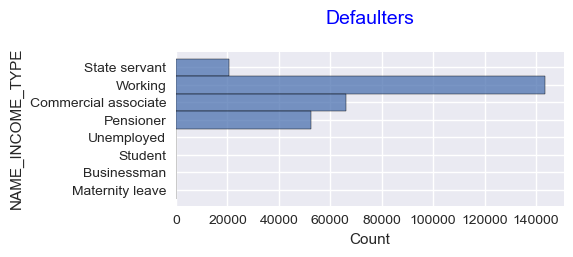

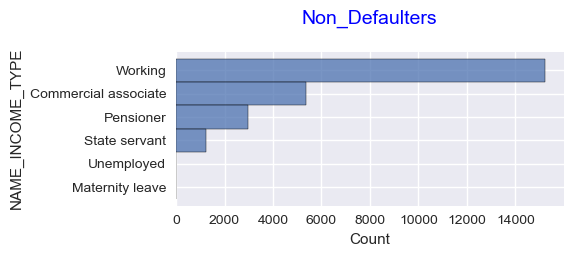

In [69]:
#for defaulters
plt.figure(figsize=(5,2))
plt.title('Defaulters',fontdict={"fontsize":14}, pad =20, color='Blue')
sns.histplot(y = Defaulters['NAME_INCOME_TYPE'])
plt.show()

#for Non_defaulters
plt.figure(figsize=(5,2))
plt.title('Non_Defaulters',fontdict={"fontsize":14}, pad =20, color='Blue')
sns.histplot(y = Non_Defaulters['NAME_INCOME_TYPE'])
plt.show()

**Insights**

- Majority of the Defaulters and Non_Defaulters, both come from working class

**NAME_FAMILY_STATUS**

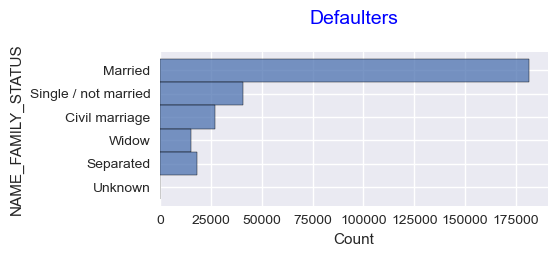

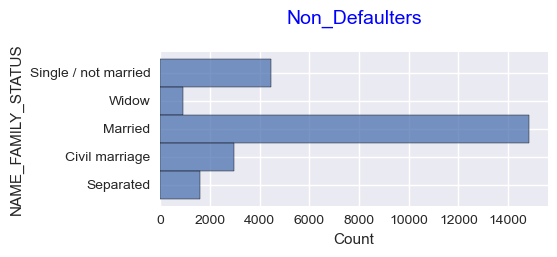

In [70]:
#for defaulters
plt.figure(figsize=(5,2))
plt.title('Defaulters',fontdict={"fontsize":14}, pad =20,color='blue')
sns.histplot(y = Defaulters['NAME_FAMILY_STATUS'])
plt.show()

#for Non_defaulters
plt.figure(figsize=(5,2))
plt.title('Non_Defaulters',fontdict={"fontsize":14}, pad =20,color='blue')
sns.histplot(y = Non_Defaulters['NAME_FAMILY_STATUS'])
plt.show()

**Insights**

- Married people tend to take more loans as compared to other categories but it doesn't impact on whether they are Defaulters or Non_Defaulters

**NAME_HOUSING_TYPE**

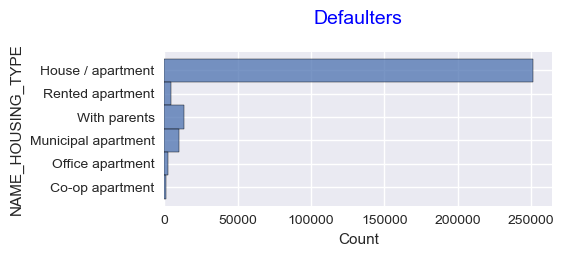

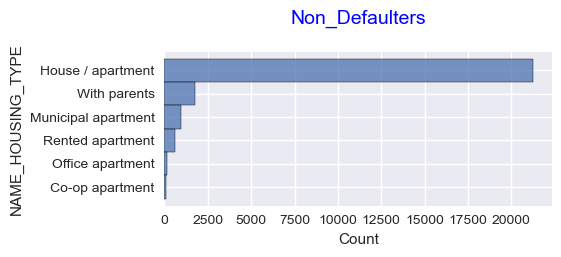

In [71]:
#for defaulters
plt.figure(figsize=(5,2))
plt.title('Defaulters',fontdict={"fontsize":14}, pad =20,color='blue')
sns.histplot(y = Defaulters['NAME_HOUSING_TYPE'])
plt.show()

#for Non_defaulters
plt.figure(figsize=(5,2))
plt.title('Non_Defaulters',fontdict={"fontsize":14}, pad =20,color='blue')
sns.histplot(y = Non_Defaulters['NAME_HOUSING_TYPE'])
plt.show()

**Insights**
- People having their own house/apartment tend to take more loans and fall in both Defaulters and Non_Defaulters category


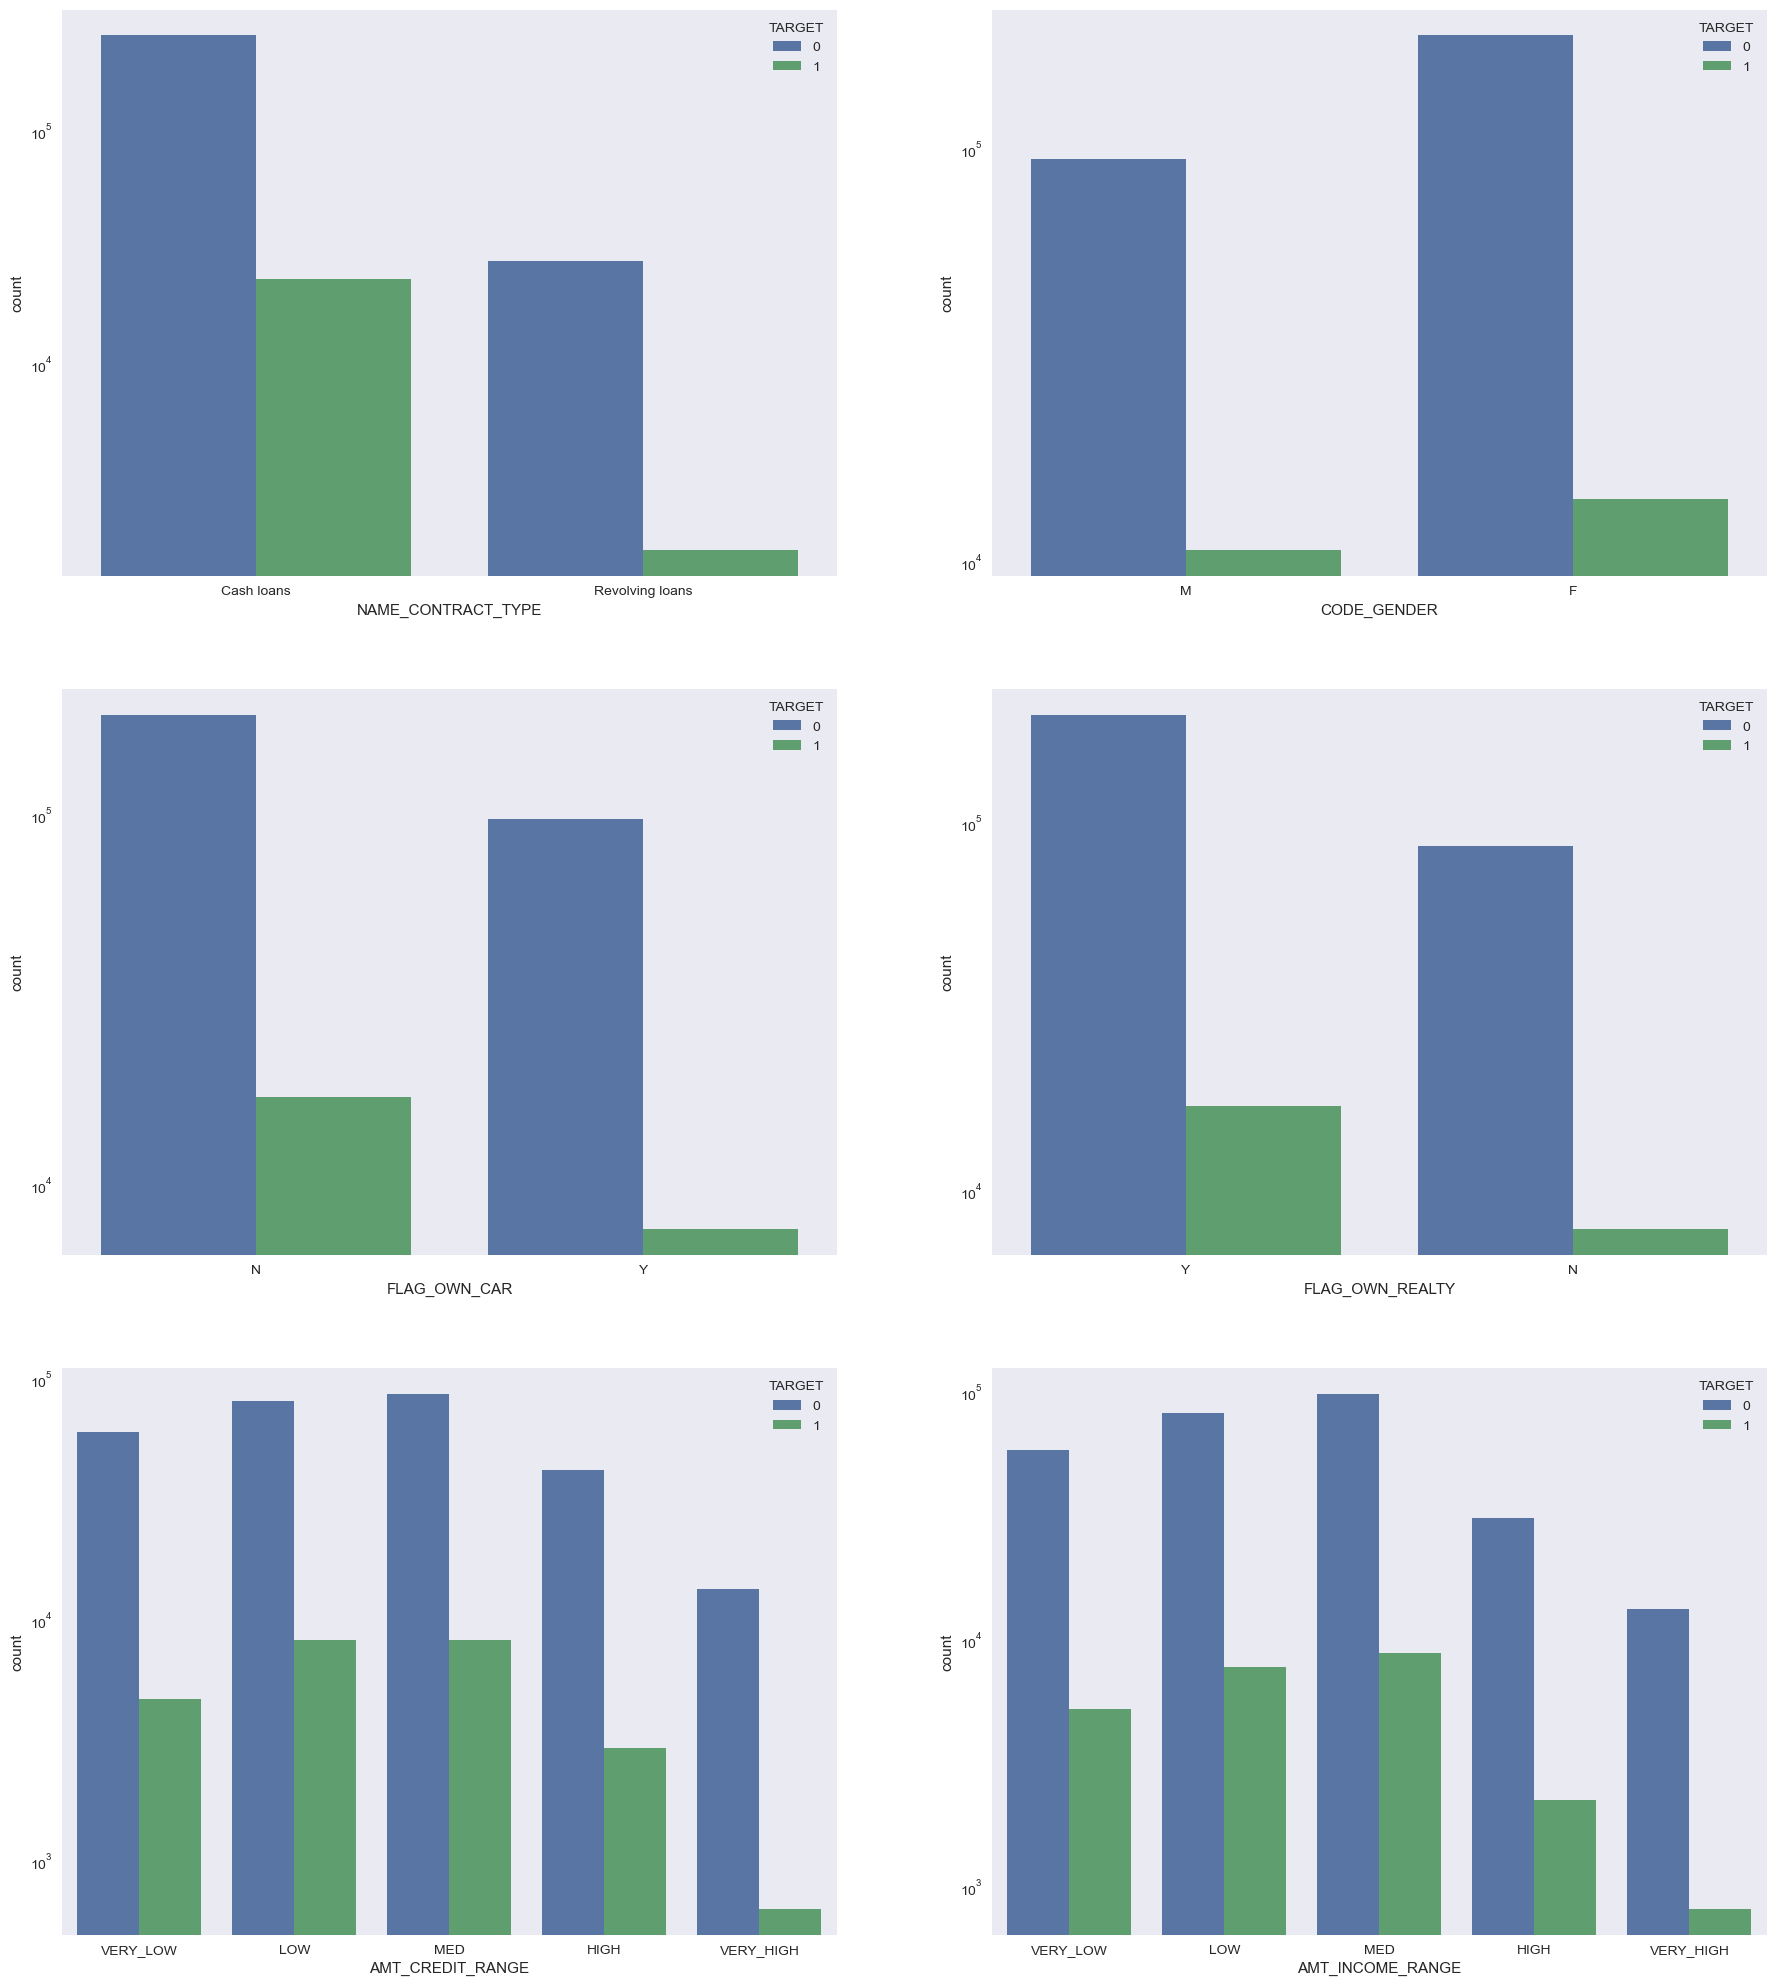

In [72]:
#Plotting the rest of the categories by making a list 'cat_cols1'

cat_cols1=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR',
            'FLAG_OWN_REALTY','AMT_CREDIT_RANGE','AMT_INCOME_RANGE']
plt.style.use('seaborn-v0_8-dark')
plt.figure(figsize=(22,25))
for i in (enumerate(cat_cols1)):
    plt.subplot(len(cat_cols1)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='TARGET',data=inp0)
    plt.yscale('log')
plt.show()

**Insights**
- People tend to take more cash loans than revovling, and Defaulters' percentage of revolving loans are less
- Females opt for loans more than Males
- Real estate people tend to take more loans
- People who don't own a car, tend to take more loans
- People with Medium total income are more likely to default
- People with high Credit amount are less likely to default


###### For comparing the numeric columns against Defaulters and Repayers,  a seperate 'cont_cols1' list is created 

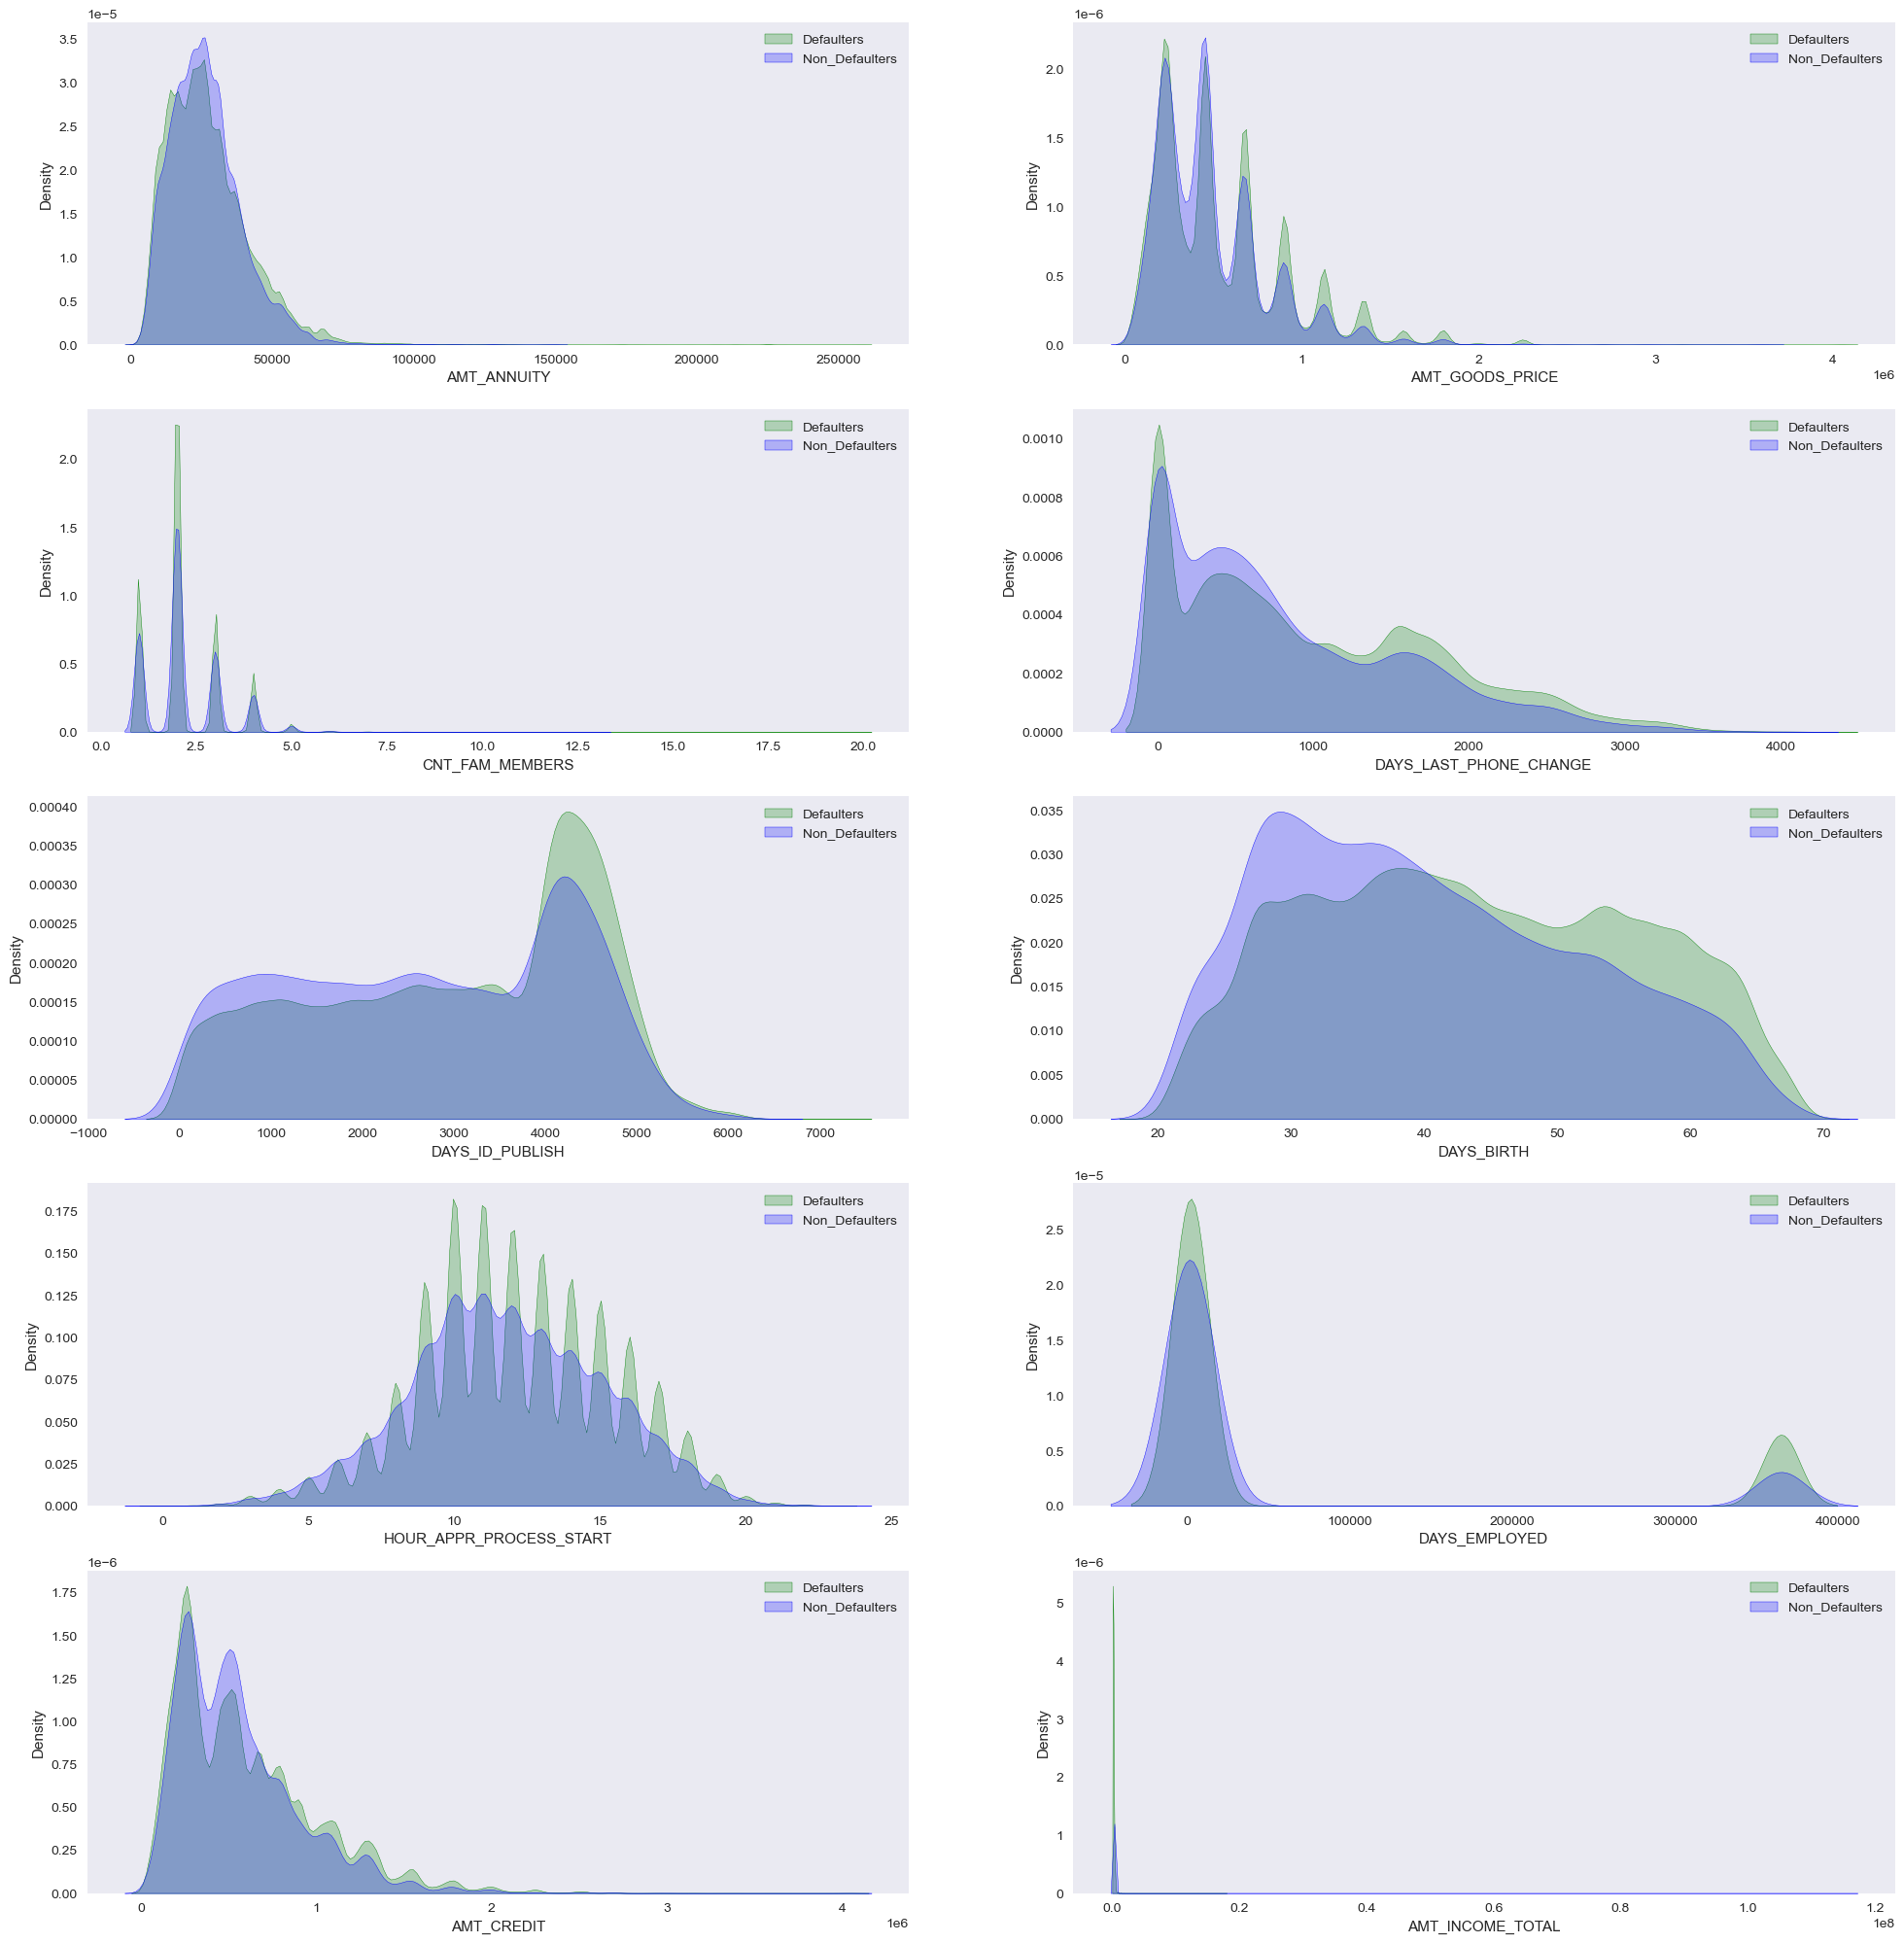

In [73]:
cont_cols2=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH',
            'DAYS_BIRTH','HOUR_APPR_PROCESS_START','DAYS_EMPLOYED','AMT_CREDIT','AMT_INCOME_TOTAL']

plt.figure(figsize=(24,25))
for i in (enumerate(cont_cols2)):
    plt.subplot(len(cont_cols2)//2,2,i[0]+1)
    sns.kdeplot(Defaulters[i[1]].dropna(),label='Defaulters',color='green', shade=True)
    sns.kdeplot(Non_Defaulters[i[1]].dropna(),label='Non_Defaulters',color='blue', shade=True)
    plt.legend()
plt.show()

**Insights**
- Individuals with lower total income are more prone to default on loans.
- Recently employed individuals are inclined to borrow more, possibly to address initial financial needs associated with starting a new job
- Retired individuals(penisoners) show a tendency to take out loans
- A significant volume of loan applications is submitted during the time frame of 10 AM to 2 PM.
- Individuals aged between 27 years (10,000 days) and 41 years (15,000 days) exhibit a higher likelihood of seeking loans
- People whose IDs were published between 4,000 and 5,000 days ago tend to take more loans
- Nuclear families tend to take more loans
- Loans are more commonly sought for smaller goods amounts
- Individuals with lower annuity amounts tend to have a higher incidence of loans

### Bivariate Analysis

In [74]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,DAYS_BIRTH_new
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.262949,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,MED,LOW,TEEN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.622246,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,HIGH,HIGH,MID_AGE
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.555912,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,VERY_LOW,VERY_LOW,MID_AGE
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.650442,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,LOW,LOW,MID_AGE
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.322738,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,LOW,LOW,MID_AGE


**For categorical columns**

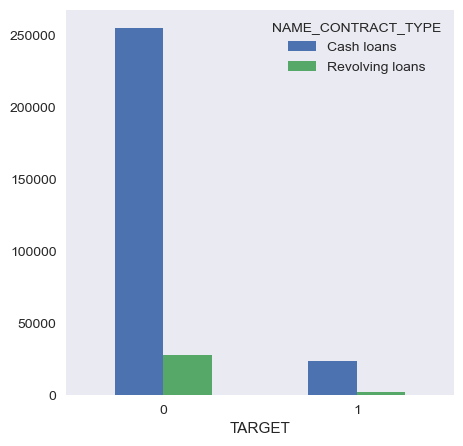

In [78]:
table_1= pd.crosstab(index=inp0['TARGET'],columns=inp0['NAME_CONTRACT_TYPE'])
table_1.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

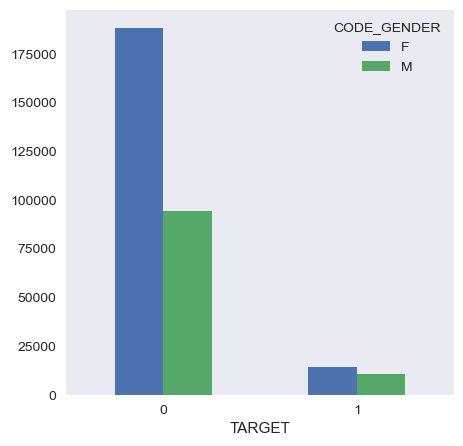

In [79]:
table_2 = pd.crosstab(index=inp0['TARGET'],columns=inp0['CODE_GENDER'])
table_2.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

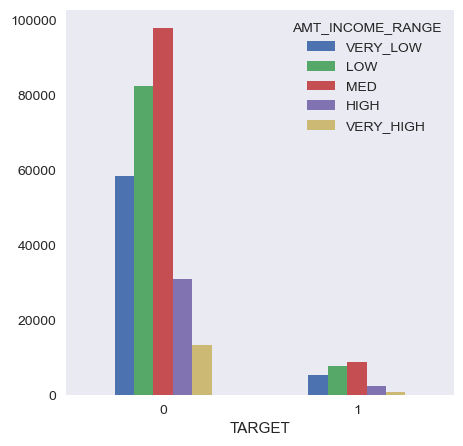

In [80]:
table_3 = pd.crosstab(index=inp0['TARGET'],columns=inp0['AMT_INCOME_RANGE'])
table_3.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

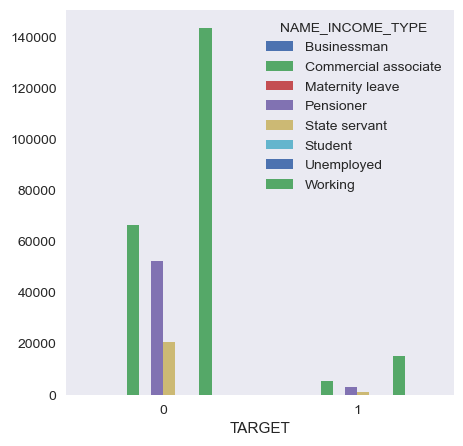

In [81]:
table_4 = pd.crosstab(index=inp0['TARGET'],columns=inp0['NAME_INCOME_TYPE'])
table_4.plot(kind="bar", figsize=(5,5),stacked=False)
plt.xticks(rotation=0)
plt.show()

#### Insights

(Note: Target-1 : Defaulters and Target-0: Non_Defaulters)

- Higher credit amounts are generally cash loans
- Females generally tend to take more loans and men are more likely to default.
- Medium income people tend to take high amount of loans and repay on time.


**For Continuous columns**

In [ ]:
continous_columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                  'DAYS_EMPLOYED','DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE','HOUR_APPR_PROCESS_START',
                  'DAYS_ID_PUBLISH','DAYS_REGISTRATION']

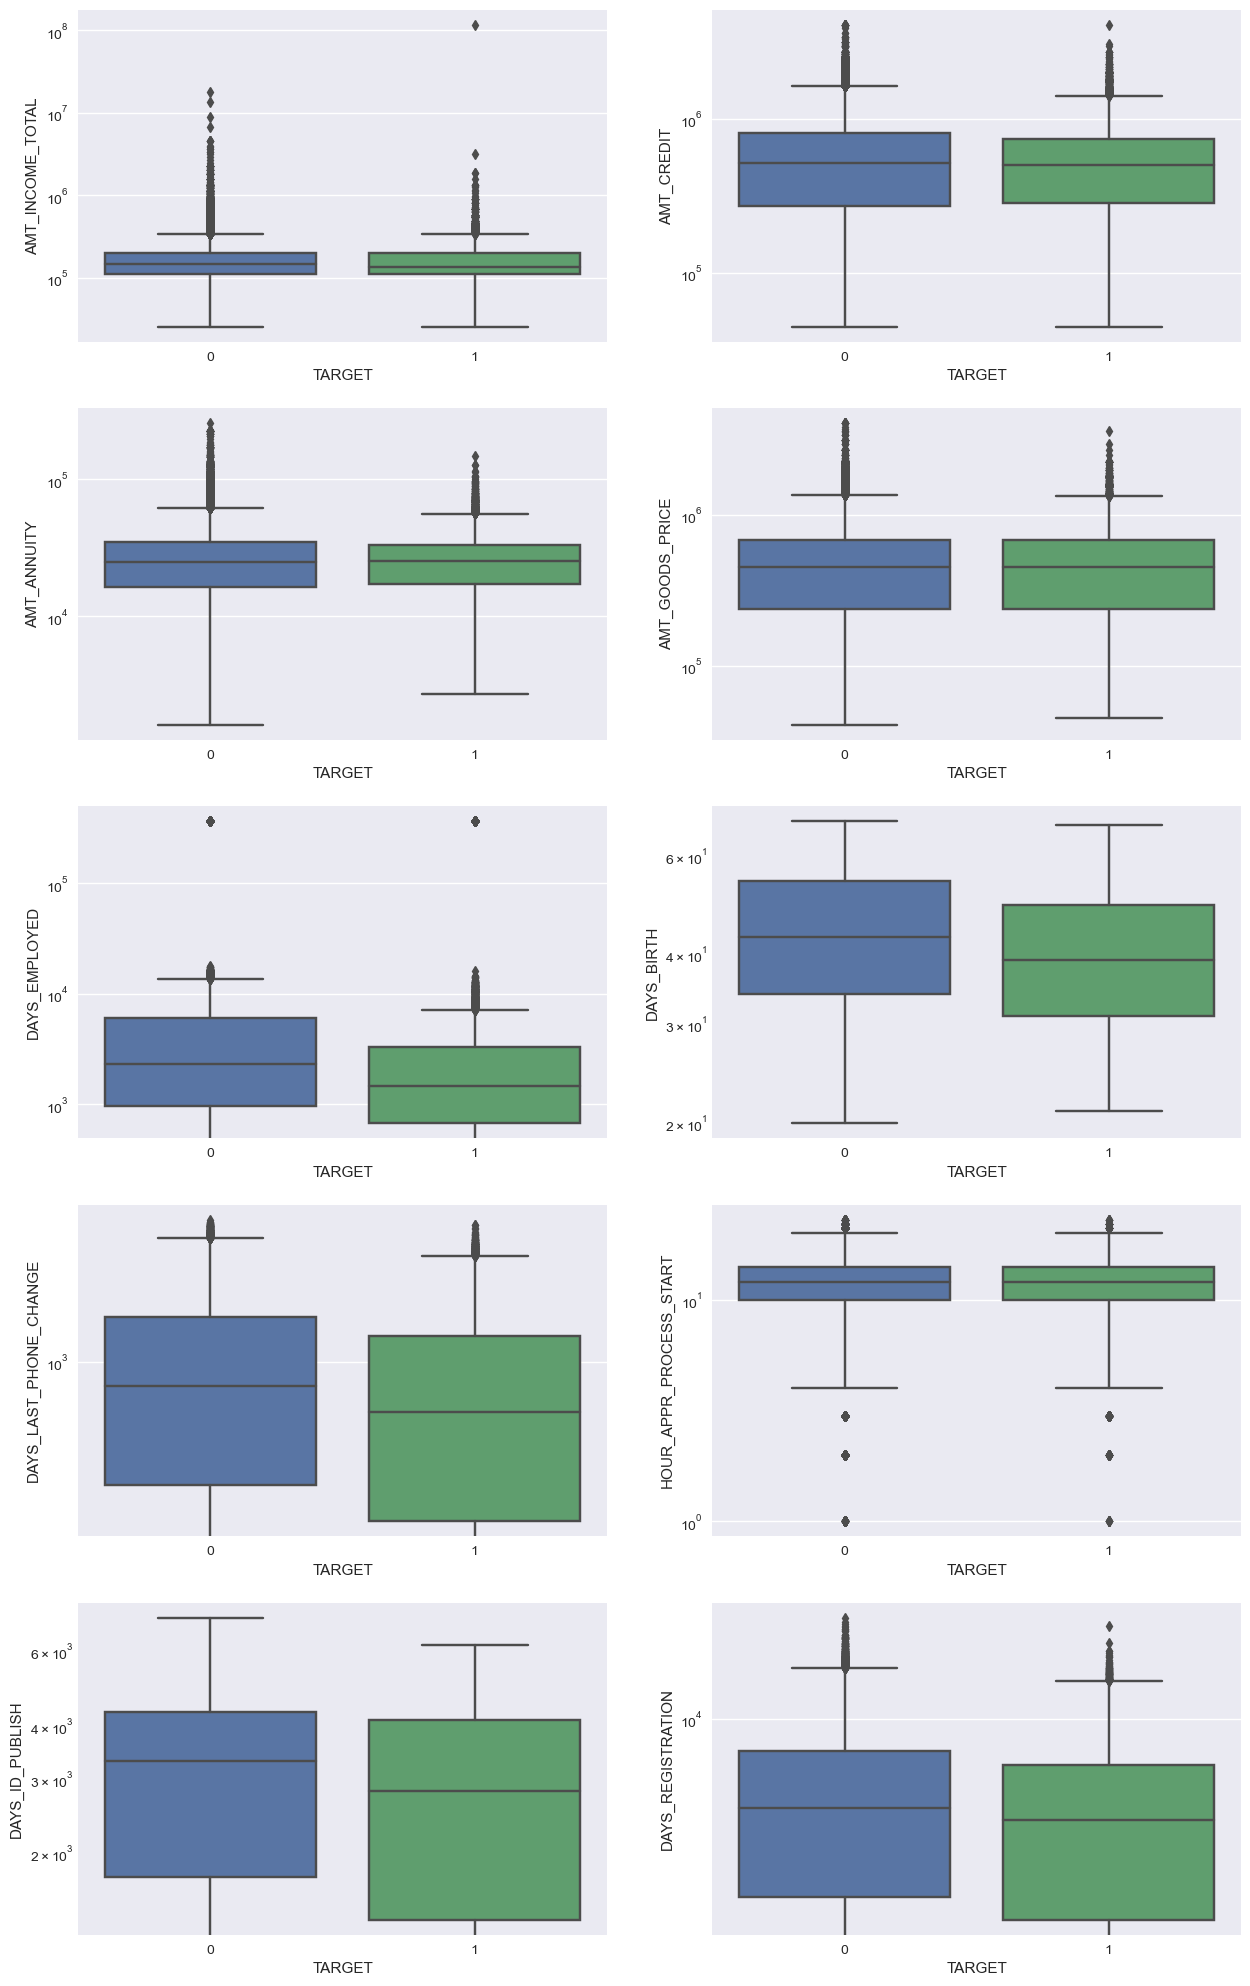

In [125]:
continous_columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                  'DAYS_EMPLOYED','DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE','HOUR_APPR_PROCESS_START',
                  'DAYS_ID_PUBLISH','DAYS_REGISTRATION']
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15,25))
for i in (enumerate(continous_columns)):
    plt.subplot(len(continous_columns)//2,2,i[0]+1)
    sns.boxplot(x='TARGET',y=inp0[i[1]].dropna(),data=inp0)
    plt.yscale('log')
plt.show()

#### Insights

(Note: Target-1 : Defaulters and Target-0: Non_Defaulters)
- The majority of individuals experiencing default situations have a lower total income.
- Clients with credit amounts exceeding 50000 are less likely to default compared to those with lower amounts, and vice versa.
- Individuals with a higher number of employment days are less likely to default
- In default cases, a majority of clients have an annuity amount greater than 25000 (median value).
- More aged Clients are less prone to default
- There is a higher occurrence of clients who updated their registration details more than 4000 days after loan approval
- The application process initiation hours are similar for both default and non-default cases.

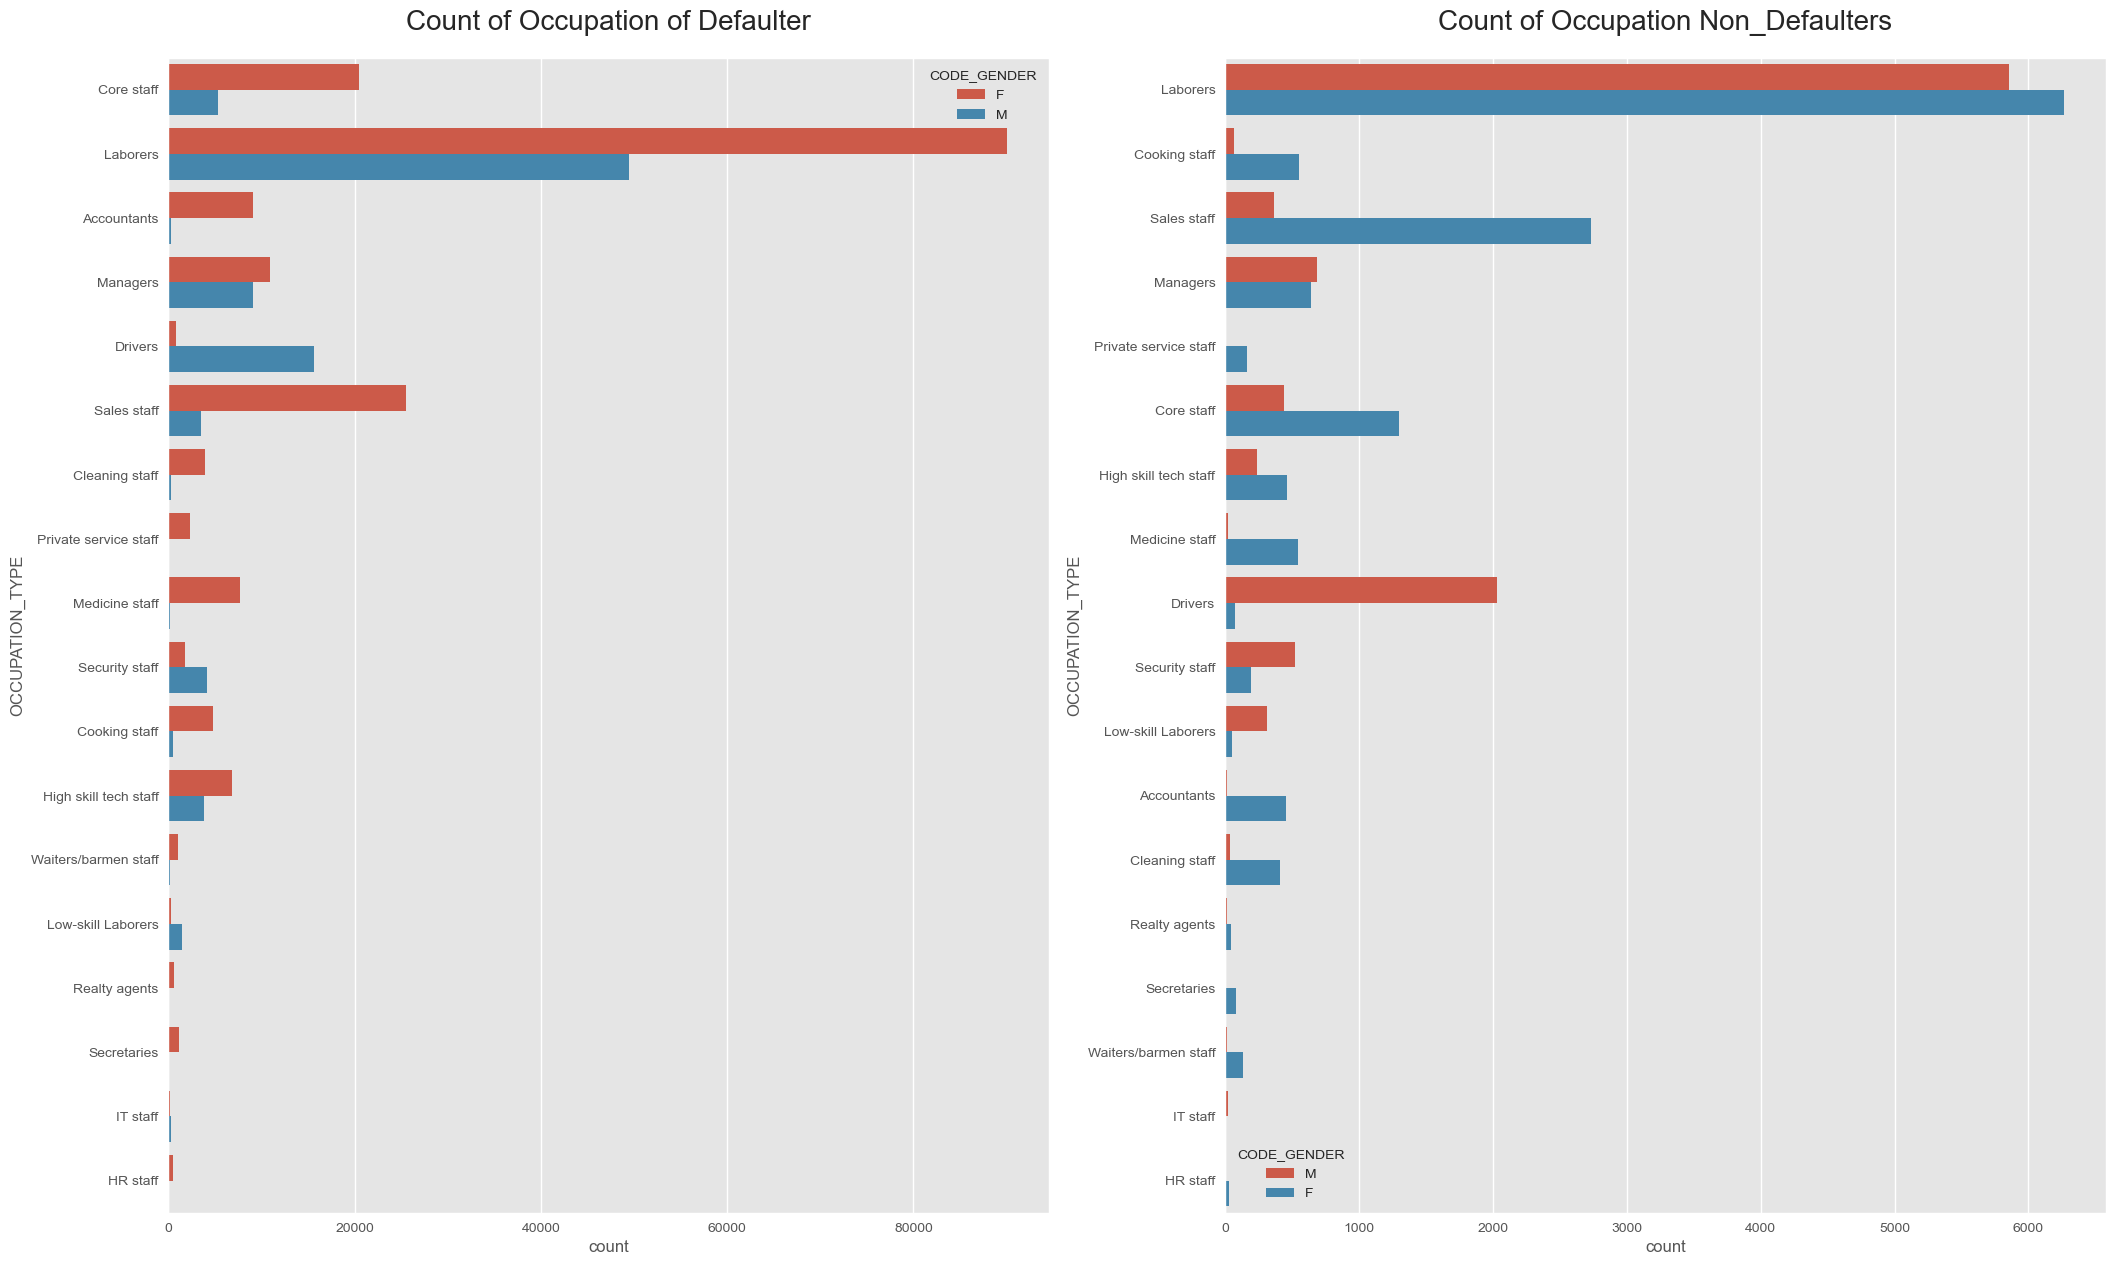

In [83]:
#OCCUPATION_TYPE with CODE_GENDER
plt.style.use('ggplot')
plt.figure(figsize = [25,15])
plt.subplot(1,2,1)
sns.countplot(y= Defaulters.OCCUPATION_TYPE, hue = Defaulters.CODE_GENDER, data = Defaulters)
plt.title('Count of Occupation of Defaulter', fontdict={"fontsize":20}, pad =20)

plt.subplot(1,2,2)
sns.countplot(y= Non_Defaulters.OCCUPATION_TYPE, hue = Non_Defaulters.CODE_GENDER, data = Non_Defaulters)
plt.title('Count of Occupation Non_Defaulters', fontdict={"fontsize":20}, pad =20)
plt.show()


**Insights**

- Laborers are the highest number of population in both defaulter and non-defaulters.
- Male Laborers are more in count of defaulter than non-defaulters.
- Female Laborers are more in count of non-defaulters than defaulters.
- Female category better than Male for repaying loans on time.

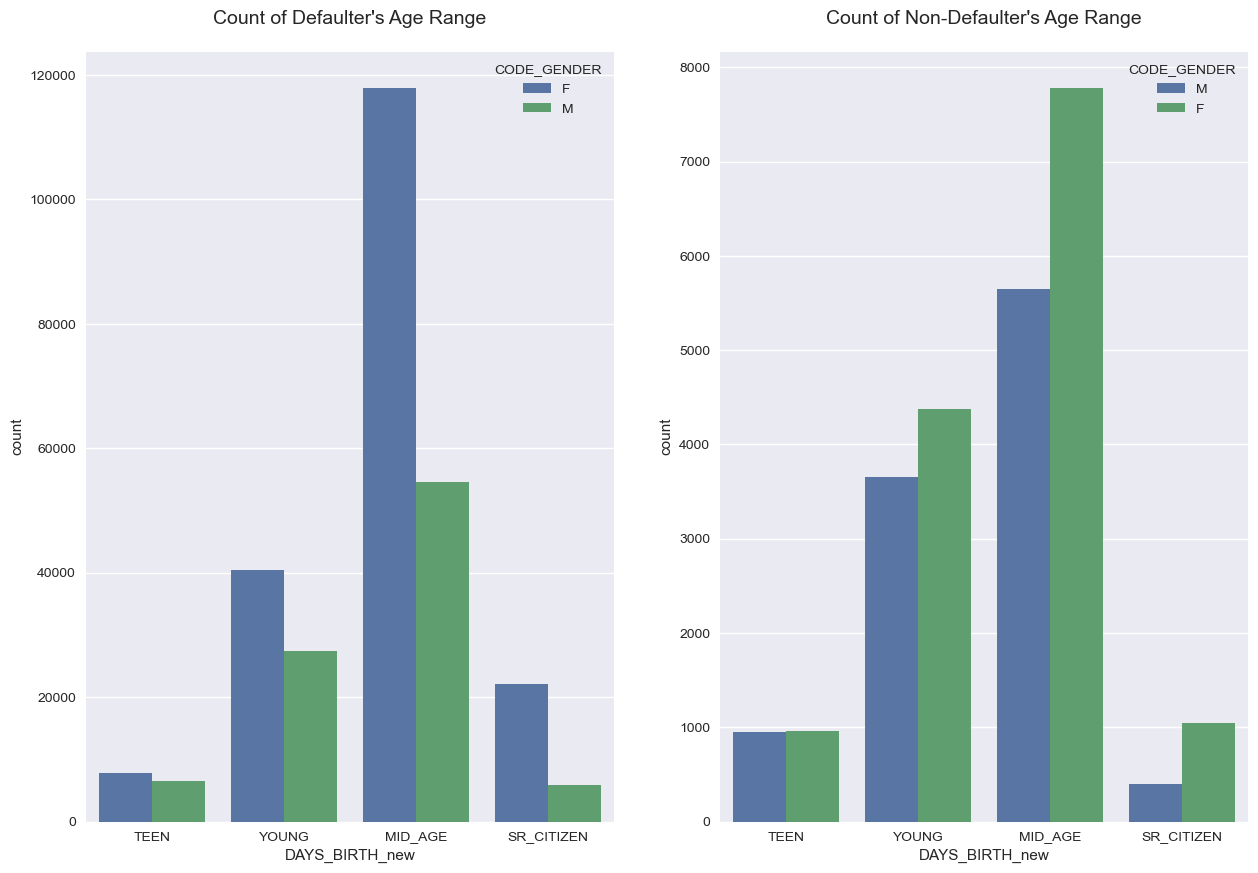

In [84]:
#Count of Age of Clients
plt.style.use('seaborn-v0_8')
plt.figure(figsize = [15,10])
plt.subplot(1,2,1)
sns.countplot(x= Defaulters.DAYS_BIRTH_new, hue = Defaulters.CODE_GENDER, data = Defaulters)
plt.title('Count of Defaulter\'s Age Range', fontdict={"fontsize":14}, pad =20)

plt.subplot(1,2,2)
sns.countplot(x= Non_Defaulters.DAYS_BIRTH_new, hue = Non_Defaulters.CODE_GENDER, data = Non_Defaulters)
plt.title('Count of Non-Defaulter\'s Age Range', fontdict={"fontsize":14}, pad =20)
plt.show()


**Insights**

- Middle Aged Males are highest in Defaulter plot.
- Middle Aged Females are highest in Non_Defaulters plot.
- Teens and Senior Citizens are lower than Young and Middle aged population in both Defaulter and Non_Defaulters plots.

### Correlation

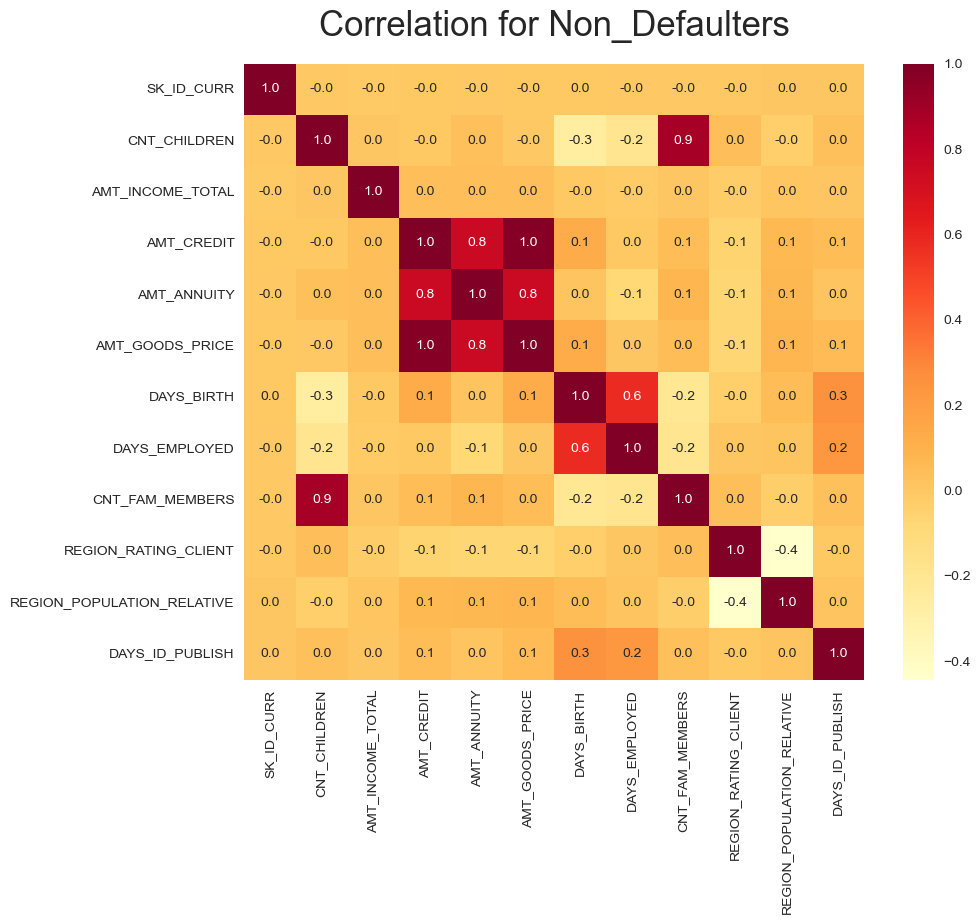

In [85]:
#Correlation for Repayers in application data
data1=Non_Defaulters[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
               'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]

plt.figure(figsize=(10,8))
sns.heatmap(data1.corr(), fmt='.1f', cmap="YlOrRd", annot=True)
plt.title("Correlation for Non_Defaulters",fontsize=25, pad=20 )
plt.show()

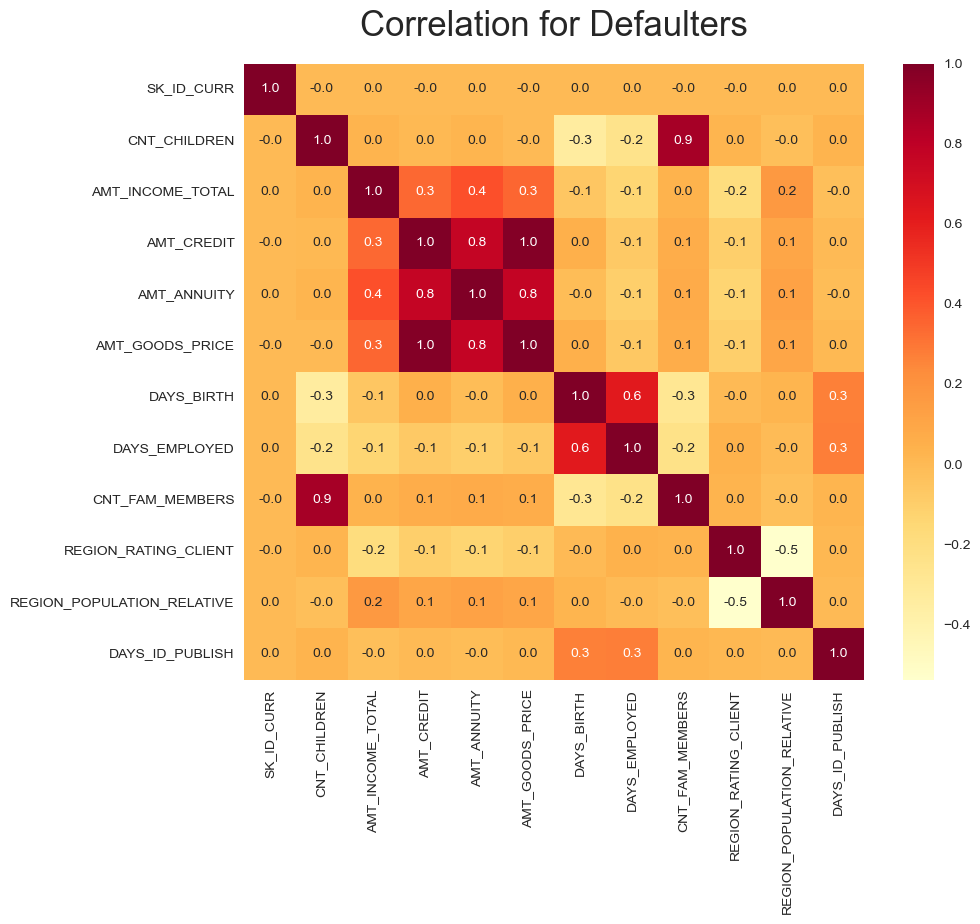

In [86]:
data1=Defaulters[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                  'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                  'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]

plt.figure(figsize=(10,8))
sns.heatmap(data1.corr(), fmt='.1f', cmap="YlOrRd", annot=True)
plt.title("Correlation for Defaulters",fontsize=25, pad=20 )
plt.show()

**Inferences**:

**Both for Non_Defaulters(Target 0) and Defaulters(Target 1)the following columns have high correlation values.**

- AMT_GOODS_PRICE and AMT_CREDIT
- AMT_ANNUITY and AMT_INCOME_TOTAL
- AMT_ANNUITY and AMT_GOODS_PRICE
- AMT_ANNUITY and AMT_CREDIT
- AMT_INCOME_TOTAL and AMT_GOODS_PRICE
- CNT_FAM_MEMBER and CNT_CHILDREN

In [87]:
data1.corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH
SK_ID_CURR,1.000000,-0.000716,0.001739,-0.000342,0.000071,-0.000235,0.001318,0.001744,-0.002789,-0.000519,0.000360,0.000077
CNT_CHILDREN,-0.000716,1.000000,0.027397,0.003081,0.020909,-0.000559,-0.336907,-0.245174,0.878571,0.022842,-0.024363,0.028751
AMT_INCOME_TOTAL,0.001739,0.027397,1.000000,0.342799,0.418948,0.349426,-0.062494,-0.140392,0.034254,-0.186573,0.167851,-0.022896
AMT_CREDIT,-0.000342,0.003081,0.342799,1.000000,0.771297,0.987022,0.047366,-0.070104,0.064536,-0.103337,0.100604,0.001464
AMT_ANNUITY,0.000071,0.020909,0.418948,0.771297,1.000000,0.776421,-0.012251,-0.104975,0.075789,-0.132120,0.120977,-0.014111
AMT_GOODS_PRICE,-0.000235,-0.000559,0.349426,0.987022,0.776421,1.000000,0.044637,-0.068527,0.062763,-0.104356,0.103826,0.003677
DAYS_BIRTH,0.001318,-0.336907,-0.062494,0.047366,-0.012251,0.044637,1.000000,0.626028,-0.285804,-0.002415,0.025332,0.270804
DAYS_EMPLOYED,0.001744,-0.245174,-0.140392,-0.070104,-0.104975,-0.068527,0.626028,1.000000,-0.238300,0.038328,-0.007198,0.276663
CNT_FAM_MEMBERS,-0.002789,0.878571,0.034254,0.064536,0.075789,0.062763,-0.285804,-0.238300,1.000000,0.027872,-0.023425,0.020460
REGION_RATING_CLIENT,-0.000519,0.022842,-0.186573,-0.103337,-0.132120,-0.104356,-0.002415,0.038328,0.027872,1.000000,-0.539005,0.008998


#### Bivariate analysis on the correlated columns

In [88]:
#function for scatter plot
def scatplot(var1,var2):

    plt.style.use('seaborn-v0_8')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,5))
    sns.scatterplot(x=var1, y=var2,data=Non_Defaulters,ax=ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non_Defaulters',fontsize=15)
    sns.scatterplot(x=var1, y=var2,data=Defaulters,ax=ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters',fontsize=15)
            
plt.show()

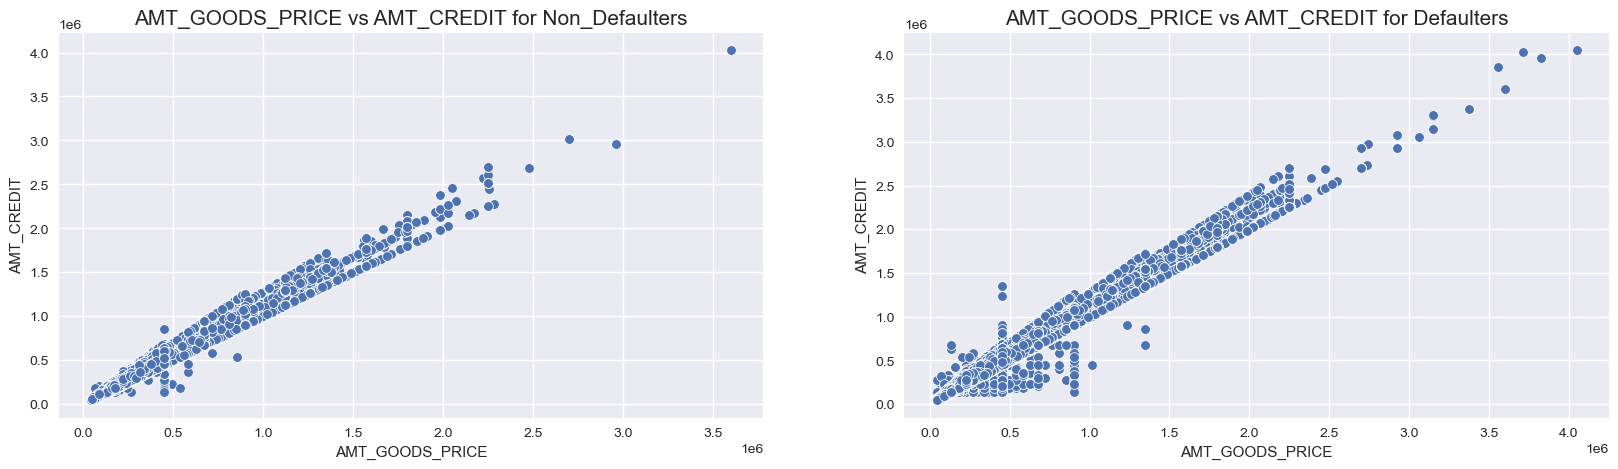

In [89]:
scatplot('AMT_GOODS_PRICE','AMT_CREDIT')

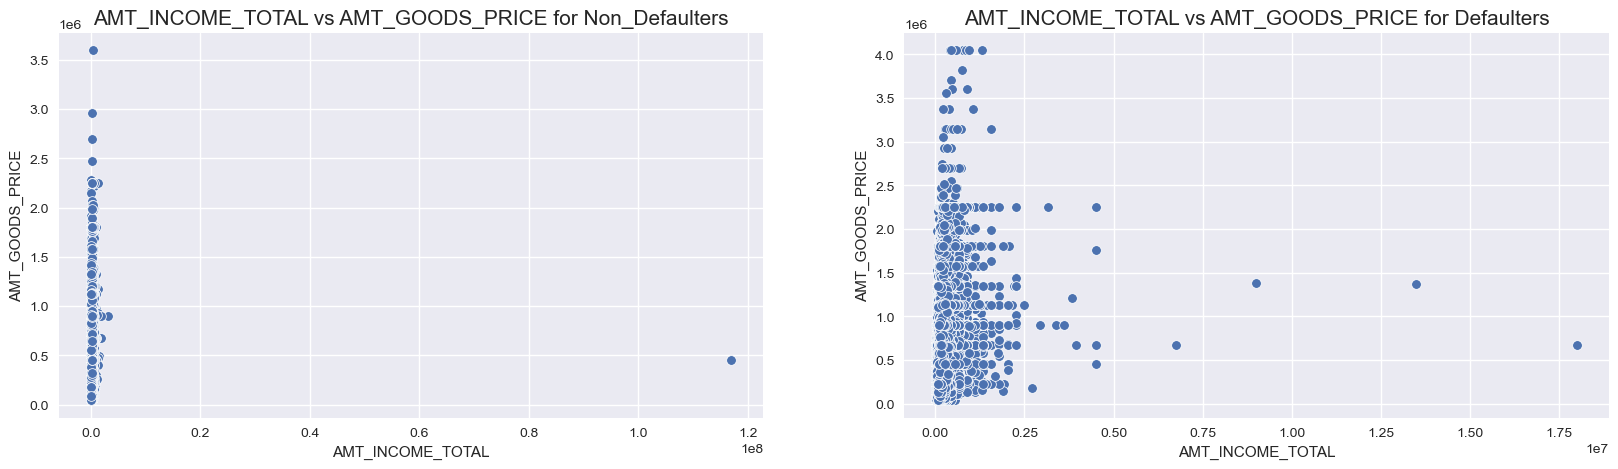

In [90]:
scatplot('AMT_INCOME_TOTAL','AMT_GOODS_PRICE')

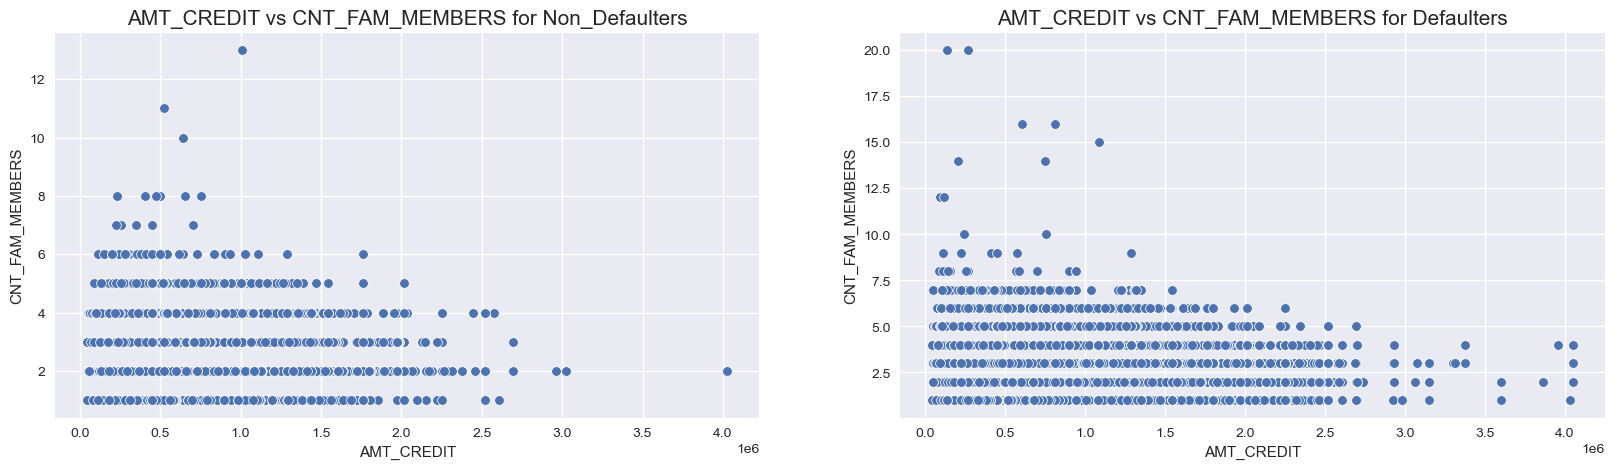

In [91]:
scatplot('AMT_CREDIT','CNT_FAM_MEMBERS')

**Insights**

- We can see that the density in the lower left corner is similar in both the case, so the people are equally likely to default if the family is small and the AMT_CREDIT is low. We can observe that larger families and people with larger AMT_CREDIT default less often.

**Analysis of Credit amount with respect to Education status**

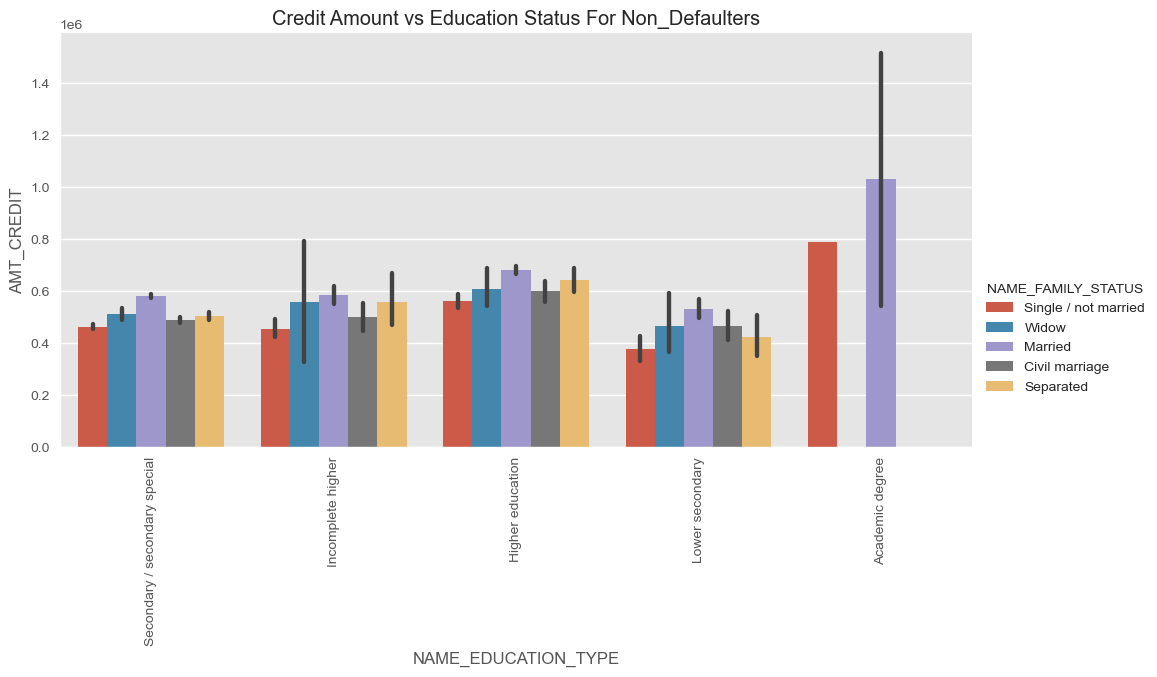

In [92]:
#NAME_EDUCATION_TYPE vs AMT_CREDIT for each family status for Repayers
plt.style.use('ggplot')
sns.catplot(data =Non_Defaulters, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=5,aspect=2, kind="bar")
plt.title('Credit Amount vs Education Status For Non_Defaulters')
plt.xticks(rotation=90)
plt.show()

**Insights**

Points to be concluded from the above graph for Non_Defaulters
- Academic degree holders have only two family types: Single and Married.
- Married customers with academic degrees typically exhibit higher credit amounts
- Across all education segments, married customers tend to have higher credit amounts.
- Customers with lower education levels generally have lower credit amounts.

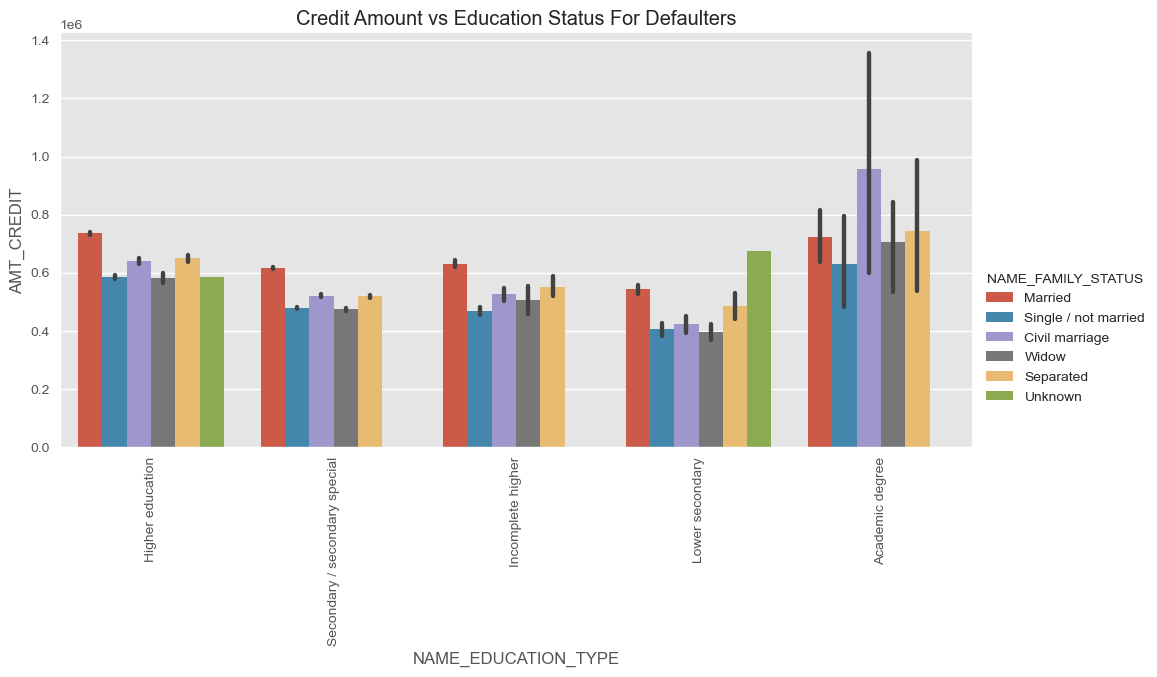

In [93]:
plt.style.use('ggplot')
sns.catplot(data =Defaulters, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=5,aspect=2, kind="bar")
plt.title('Credit Amount vs Education Status For Defaulters')
plt.xticks(rotation=90)
plt.show()

**Insights**

Points to be concluded from the above graph for Defaulters
- Individuals with academic degrees generally have higher credit amounts, with the civil marriage segment exhibiting the highest credit amounts among them.
- Customers with lower education levels tend to have lower credit amounts, with widows having the lowest credit amounts among this group.
- Married customers, across nearly all education segments except lower secondary and academic degrees, tend to have higher credit amounts.

### Performing data cleaning on "previous_application" dataframe (inp1)

#### 2nd dataset - Previous Application
- 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [94]:
inp1=pd.read_csv("previous_application.csv")

In [95]:
#Checking the previous application data
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
#checking the shape of the dataframe
inp1.shape

(1670214, 37)

In [97]:
#describing the dataframe
inp1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


Describe shows that there are negative values in some columns, which needs to be treated

### Data Cleaning

In [98]:
#Converting negative columns to positive
inp1['DAYS_DECISION']=inp1['DAYS_DECISION'].abs()
inp1['SELLERPLACE_AREA']=inp1['SELLERPLACE_AREA'].abs()

In [99]:
inp1['DAYS_DECISION'].unique()

array([  73,  164,  301, ..., 1967, 2389,    1], dtype=int64)

In [100]:
inp1['SELLERPLACE_AREA'].unique()

array([  35,    1,  200, ..., 2233,  887, 2420], dtype=int64)

All the negative values are converted into positive

In [101]:
#further checking for the rest of missing values
100*inp1.isnull().mean()

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [102]:
#Finding the columns with more than 50% missing values and assigning them into a new list
cutoff=50
cols_to_drop2=list(inp1.columns[100*inp1.isnull().mean()>cutoff])
print(cols_to_drop2)

['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']


In [103]:
#dropping the columns with more than 50% missing values
inp1=inp1.drop(cols_to_drop2,axis=1)

In [104]:
#checking the shape of the dataframe after dropping the columns
inp1.shape

(1670214, 33)

Now, total columns reduced from 122 to 73

#### Merging both application_data and previous_application 

- Here, performed a left join to retain all rows in the application_data as it ensures that we acquire historical application data for each applicant. 
- Opting for an inner join would result in the loss of data for new customers without a previous record. 
- Additionally, an inner join would duplicate the current data for each occurrence in the previous application data.

In [105]:
merged_inp=pd.merge(inp0,inp1,how='left',on='SK_ID_CURR',suffixes=('_Current', '_Previous'))
merged_inp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_Current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_Current,AMT_ANNUITY_Current,AMT_GOODS_PRICE_Current,NAME_TYPE_SUITE_Current,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_Current,HOUR_APPR_PROCESS_START_Current,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,DAYS_BIRTH_new,SK_ID_PREV,NAME_CONTRACT_TYPE_Previous,AMT_ANNUITY_Previous,AMT_APPLICATION,AMT_CREDIT_Previous,AMT_GOODS_PRICE_Previous,WEEKDAY_APPR_PROCESS_START_Previous,HOUR_APPR_PROCESS_START_Previous,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_Previous,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.262949,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,MED,LOW,TEEN,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.622246,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,HIGH,HIGH,MID_AGE,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.622246,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,HIGH,HIGH,MID_AGE,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Hi

In [122]:
#info of the merged data
merged_inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Columns: 108 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: category(3), float64(36), int32(1), int64(40), object(28)
memory usage: 1.1+ GB


In [123]:
#shape of the merged data
merged_inp.shape

(1430155, 108)

### Univariate Analysis

In [107]:
#Considering some of the categorial and continuous columns in two seperate lists

#categorical columns
cat_columns =['NAME_CONTRACT_TYPE_Current','NAME_CONTRACT_TYPE_Previous','WEEKDAY_APPR_PROCESS_START_Current',
              'NAME_TYPE_SUITE_Current','NAME_TYPE_SUITE_Previous','WEEKDAY_APPR_PROCESS_START_Previous','AMT_INCOME_RANGE','AMT_CREDIT_RANGE',
              'NAME_YIELD_GROUP','NAME_CLIENT_TYPE']

#continuous columns
cont_columns= ['AMT_CREDIT_Previous','AMT_CREDIT_Current','AMT_ANNUITY_Current','AMT_ANNUITY_Previous',
                   'AMT_GOODS_PRICE_Current','AMT_GOODS_PRICE_Previous','CNT_FAM_MEMBERS','CNT_CHILDREN',
                  'HOUR_APPR_PROCESS_START_Previous','HOUR_APPR_PROCESS_START_Current']

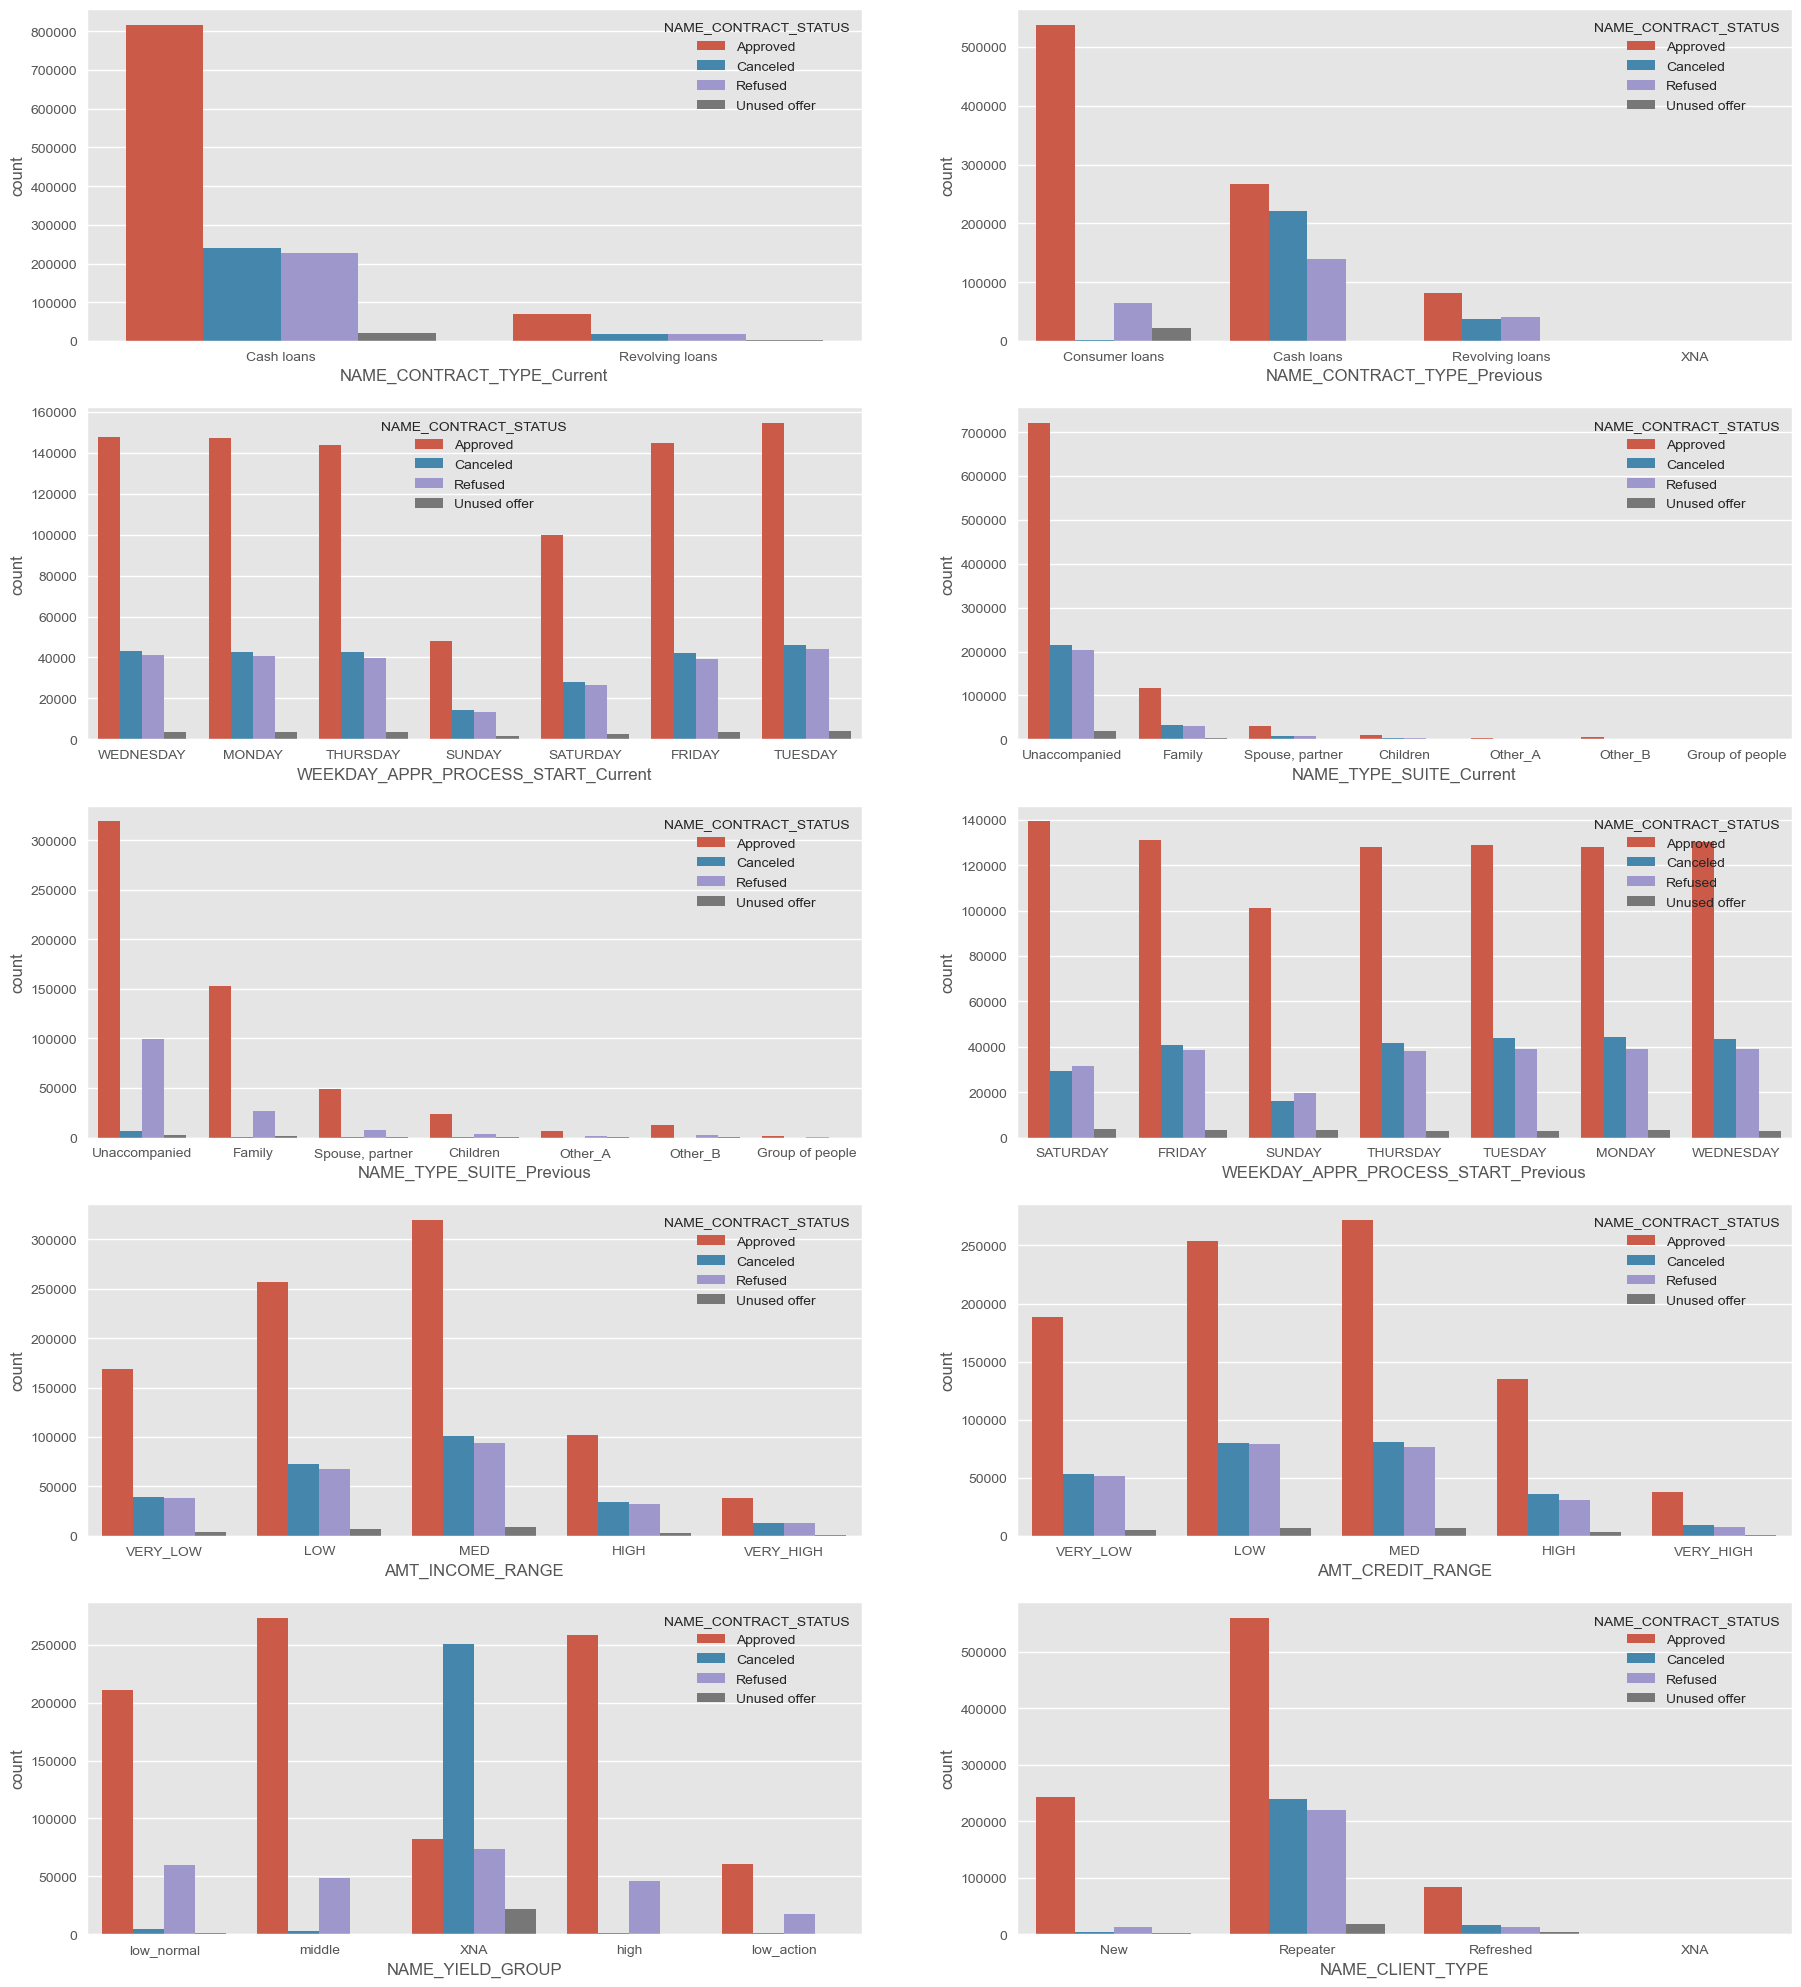

In [108]:
#categorical columns
plt.style.use('ggplot')
plt.figure(figsize=(22,25))
for i in (enumerate(cat_columns)):
    plt.subplot(len(cat_columns)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=merged_inp)
plt.show()

**Insights**
- Currently, the bank offers only two types of loans: Cash and Revolving Loans
- In the past, the bank provided Cash, Revolving, and Consumer loans, with Consumer loans having the highest count. Now, Cash loans have the highest count.
- In previous applications, Saturday boasted the highest approval rate, while in the current application, it is Tuesday.
- The value of AMT_CREDIT_RANGE doesn't impact the approval of loans
- Unaccompanied individuals hold the highest number in both NAME_CONTRACT_TYPE_Previous and NAME_CONTRACT_TYPE_Current.
- The NAME_YIELD_GROUP in the middle category records the highest approval rates.
- Repeater applicants secure the highest number of approved loans
- Low AMT_INCOME_RANGE exhibits the highest approval rates.

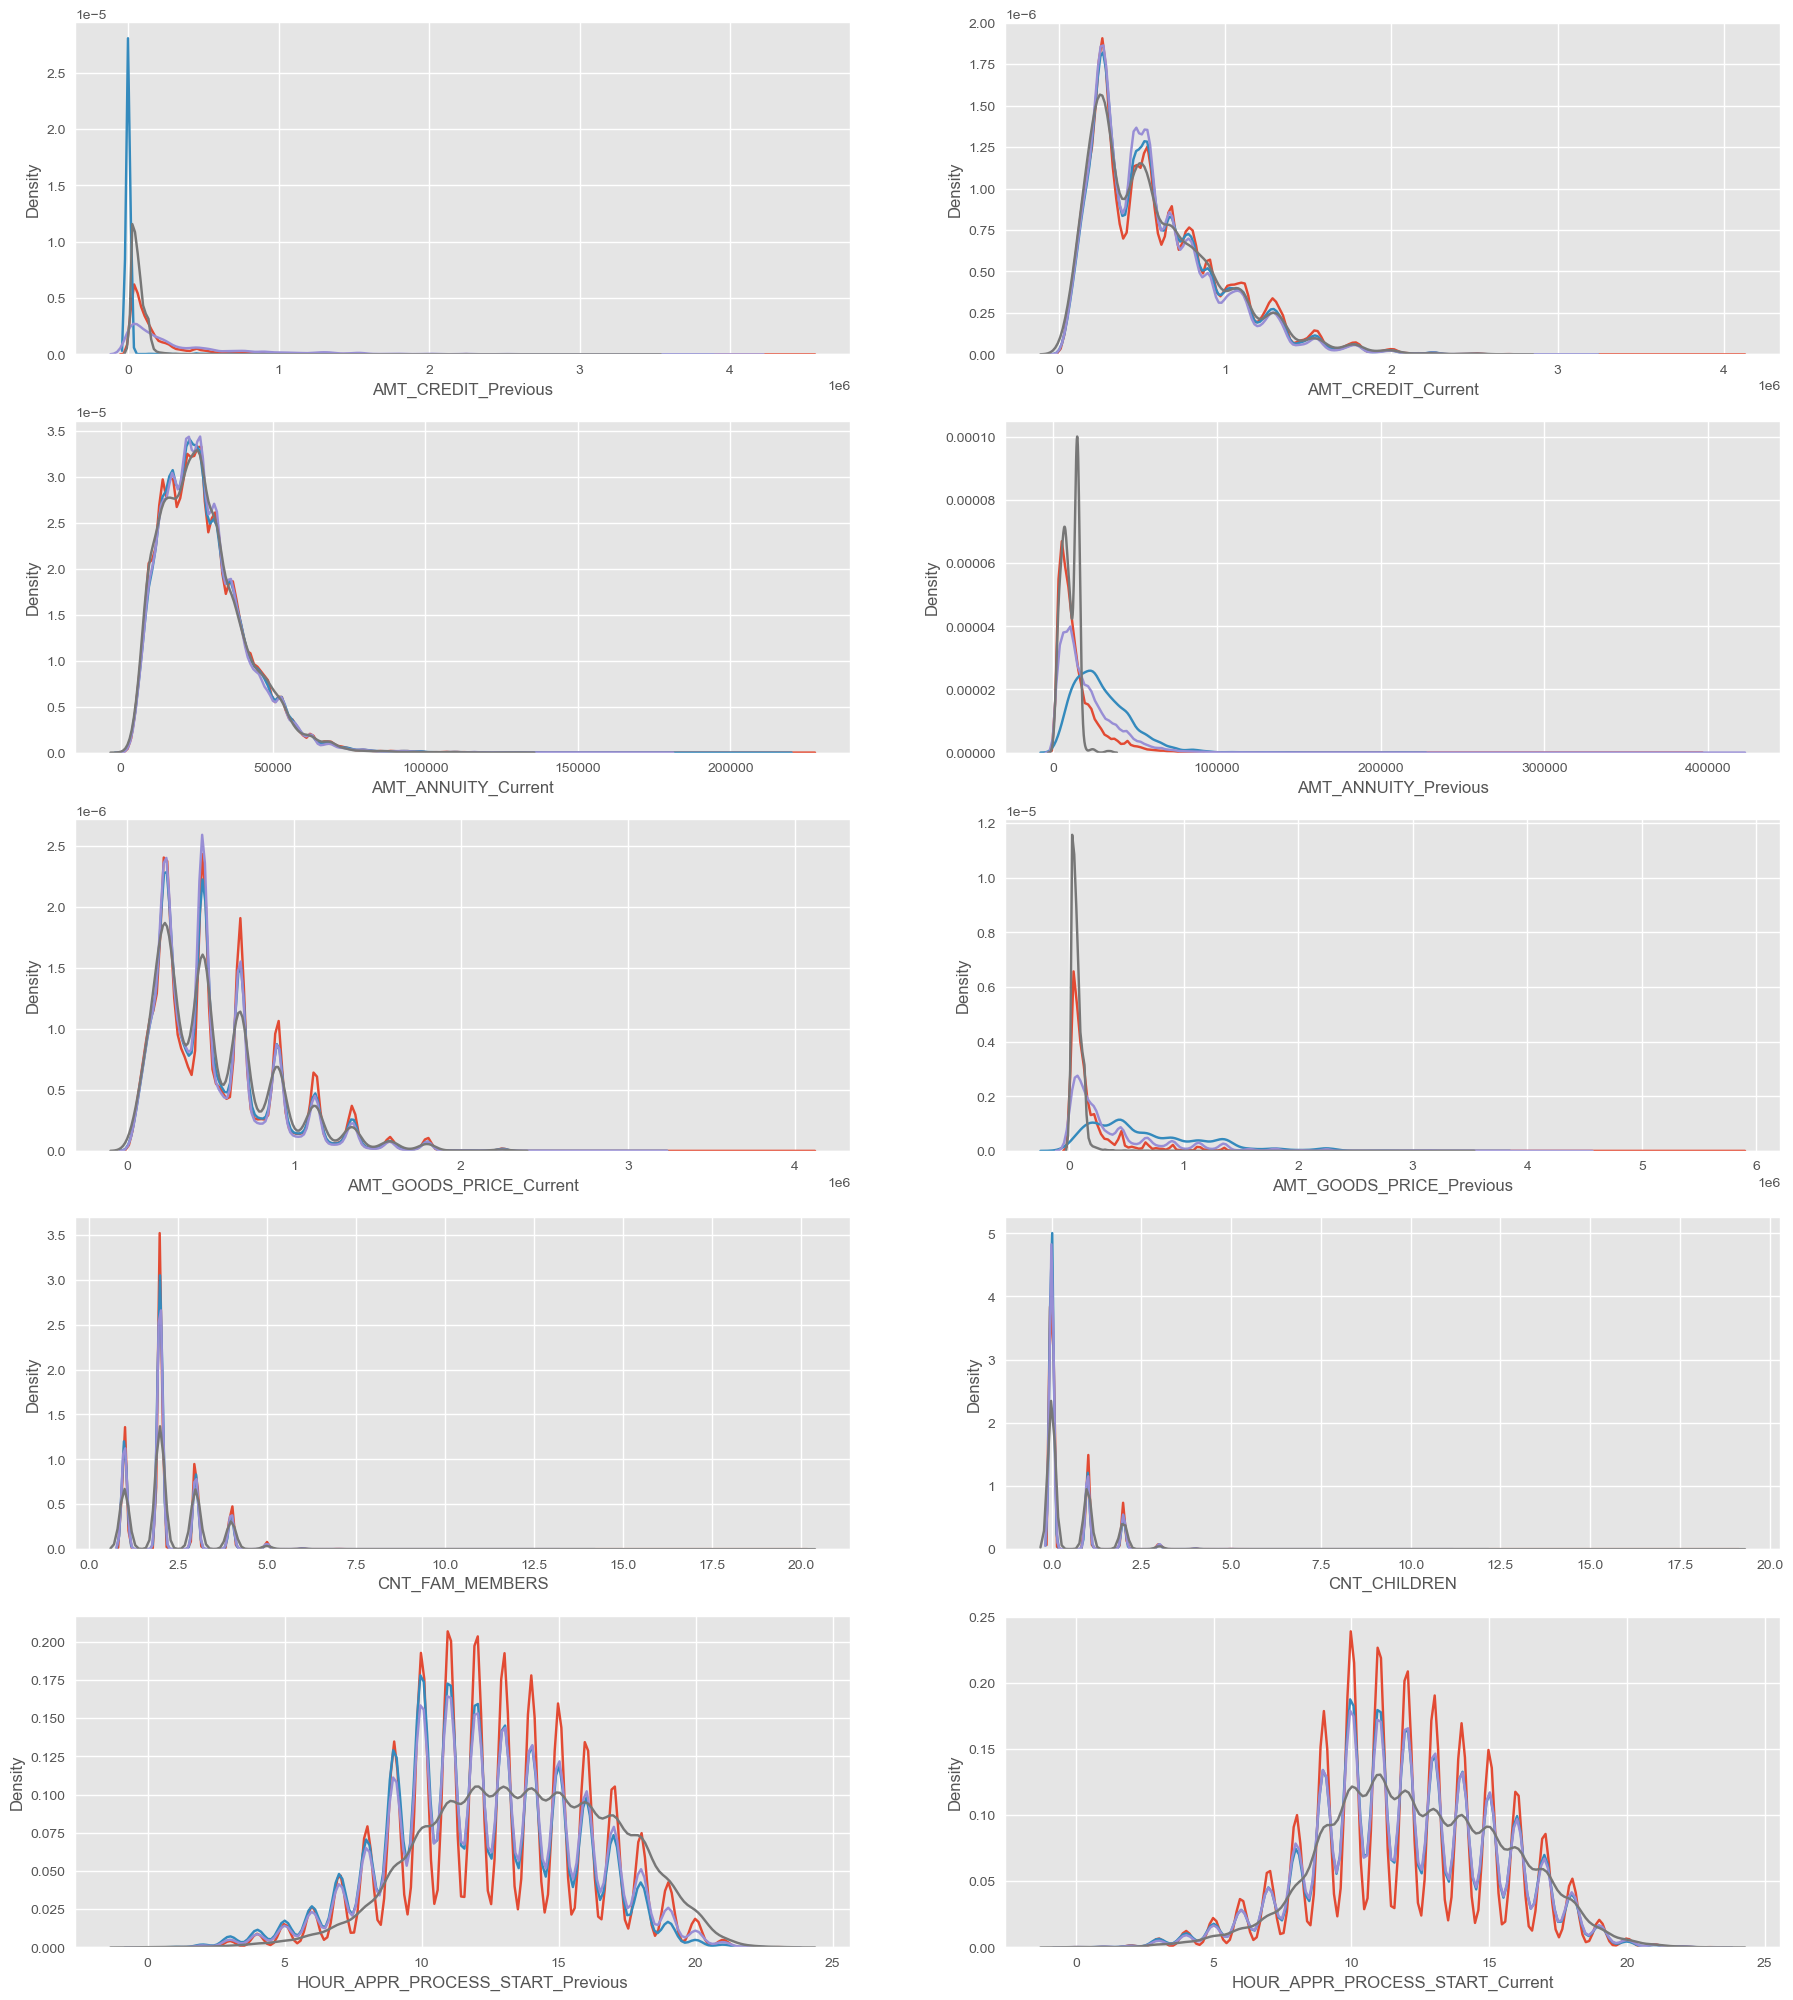

In [124]:
#continuous columns

plt.figure(figsize=(22,25))
for i in (enumerate(cont_columns)):
    plt.subplot(len(cont_columns)//2,2,i[0]+1)
    sns.kdeplot(merged_inp.loc[merged_inp.NAME_CONTRACT_STATUS=='Approved',:][i[1]].dropna(),label='Approved')
    sns.kdeplot(merged_inp.loc[merged_inp.NAME_CONTRACT_STATUS=='Canceled',:][i[1]].dropna(),label='Cancelled')
    sns.kdeplot(merged_inp.loc[merged_inp.NAME_CONTRACT_STATUS=='Refused',:][i[1]].dropna(),label='Refused')
    sns.kdeplot(merged_inp.loc[merged_inp.NAME_CONTRACT_STATUS=='Unused offer',:][i[1]].dropna(),label='Unused offer')

plt.show() 

**Insights**

As we can conclude from the plots 

- Nuclear families demonstrate a tendency to apply for more loans.
- Previously, the bank experienced a high number of unused offers, whereas currently, refusals are predominant, especially concerning AMT_GOODS_PRICE.
- Previously, the bank had a substantial number of unused offers; presently, cancellations/refusals are comparable, specifically regarding AMT_ANNUITY..
- It is observed that, a significant volume of applications is submitted between 9 AM to 2 PM in both Current and Previous datasets.
- Consequently, the busiest hours for the bank are from 9 AM to 2 PM.

### Bivariate Analysis

**For Categorical**

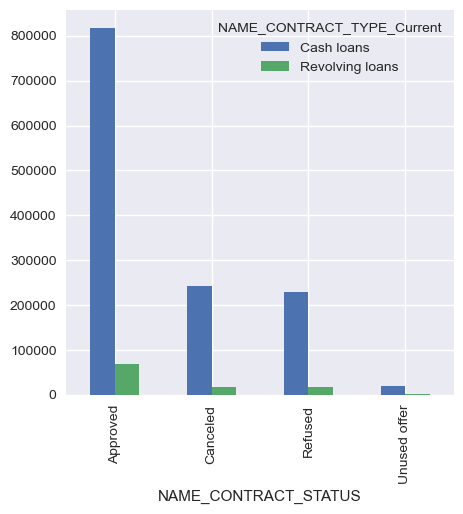

In [110]:
table_5= pd.crosstab(index=merged_inp['NAME_CONTRACT_STATUS'],columns=merged_inp['NAME_CONTRACT_TYPE_Current'])
plt.style.use('seaborn-v0_8')
table_5.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

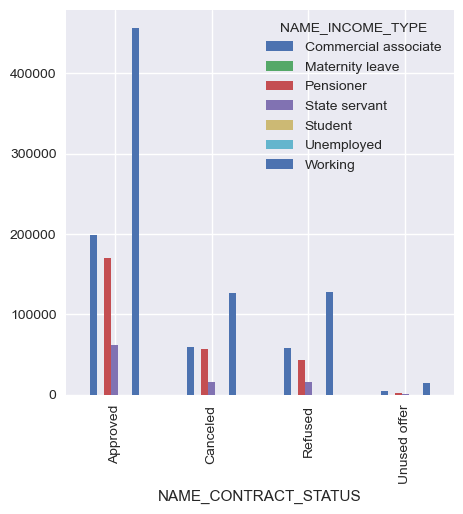

In [111]:
table_6= pd.crosstab(index=merged_inp['NAME_CONTRACT_STATUS'],columns=merged_inp['NAME_INCOME_TYPE'])
table_6.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

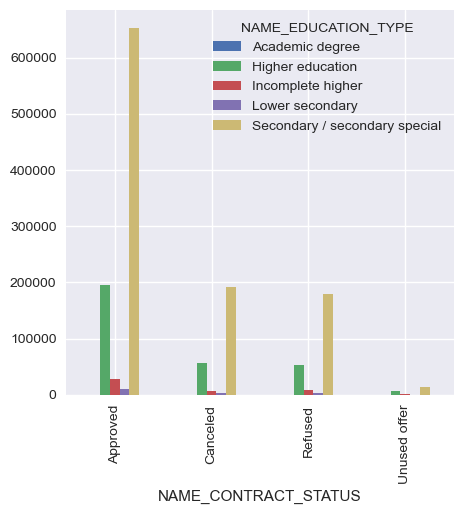

In [112]:
table_7= pd.crosstab(index=merged_inp['NAME_CONTRACT_STATUS'],columns=merged_inp['NAME_EDUCATION_TYPE'])
table_7.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

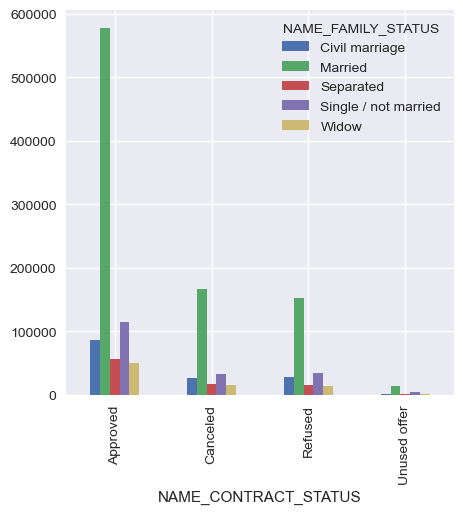

In [113]:
table_8= pd.crosstab(index=merged_inp['NAME_CONTRACT_STATUS'],columns=merged_inp['NAME_FAMILY_STATUS'])
table_8.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

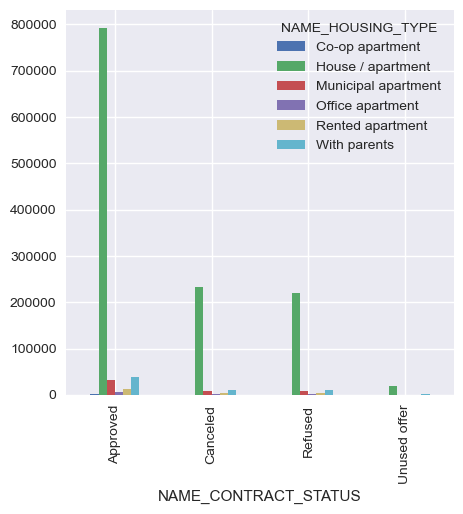

In [114]:
table_9= pd.crosstab(index=merged_inp['NAME_CONTRACT_STATUS'],columns=merged_inp['NAME_HOUSING_TYPE'])
table_9.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

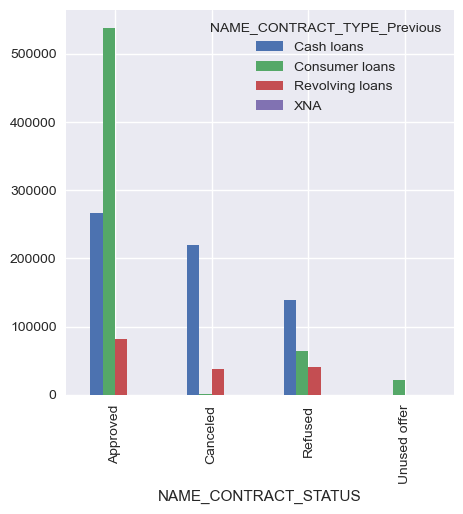

In [115]:
table_10= pd.crosstab(index=merged_inp['NAME_CONTRACT_STATUS'],columns=merged_inp['NAME_CONTRACT_TYPE_Previous'])
table_10.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

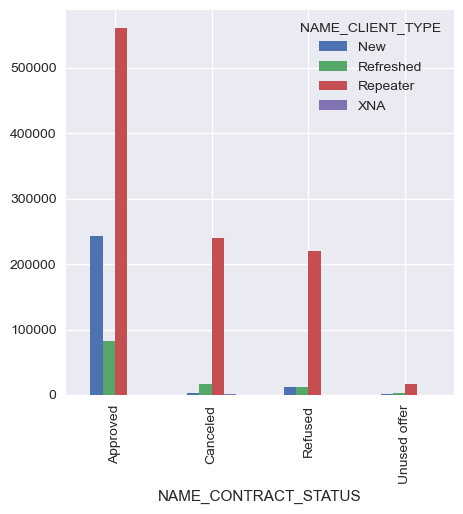

In [116]:
table_11= pd.crosstab(index=merged_inp['NAME_CONTRACT_STATUS'],columns=merged_inp['NAME_CLIENT_TYPE'])
table_11.plot(kind="bar", figsize=(5,5),stacked=False)
plt.show()

**For Continuous columns**

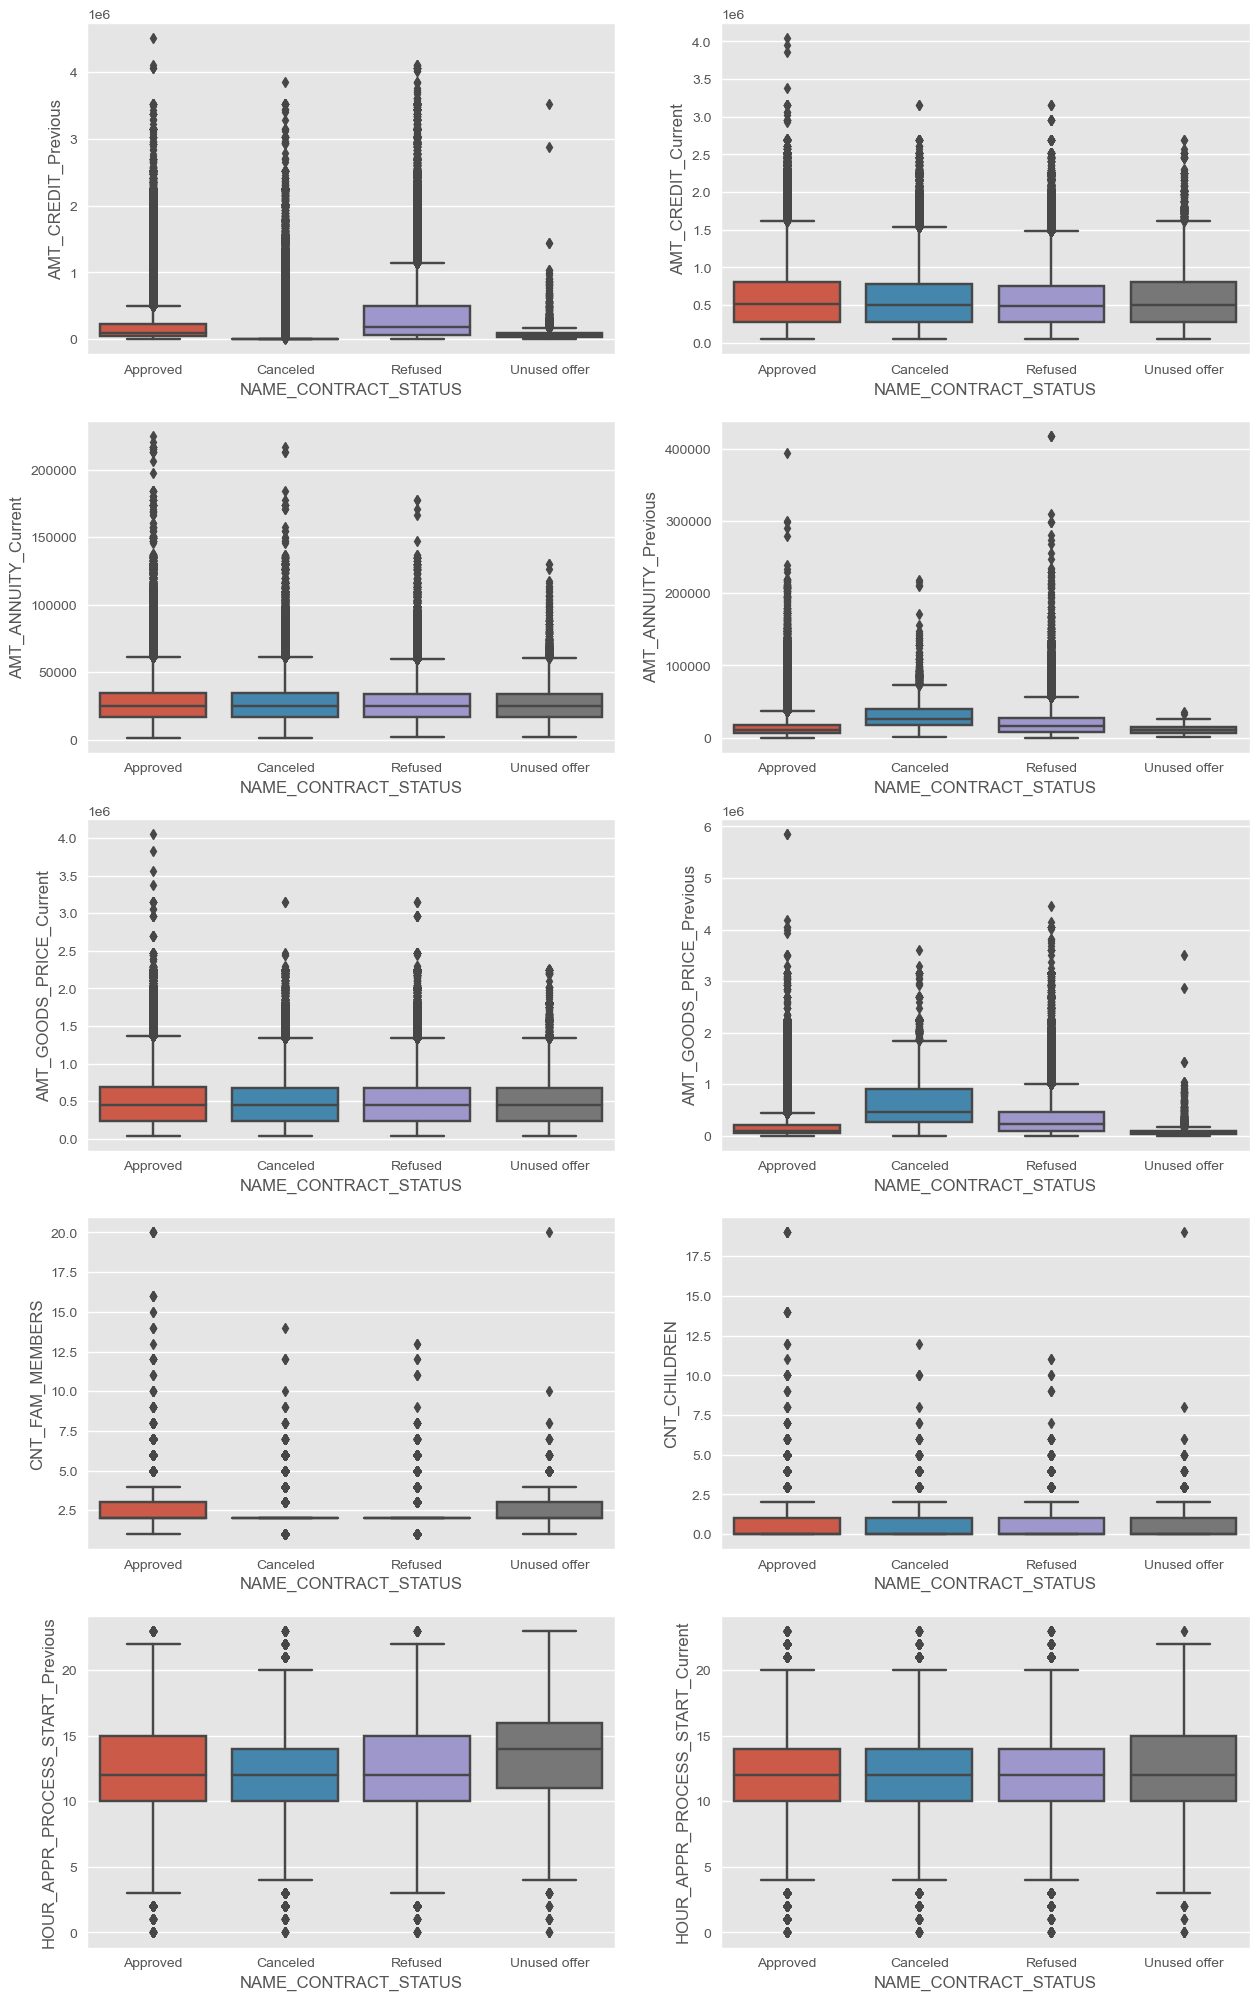

In [117]:
#Bi-variate continous plots
plt.style.use('ggplot')
plt.figure(figsize=(15,25))
for i in (enumerate(cont_columns)):
    plt.subplot(len(cont_columns)//2,2,i[0]+1)
    sns.boxplot(x='NAME_CONTRACT_STATUS',y=merged_inp[i[1]].dropna(),data=merged_inp)
plt.show() 

In [119]:
def cat_vs_number(cat, num):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(10,8))
    
    sns.boxenplot(x=cat,y = num, data=merged_inp)
    ax.set_ylabel(f'{num}')
    ax.set_xlabel(f'{cat}')

    ax.set_title(f'{cat} Vs {num}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
     
    plt.show()

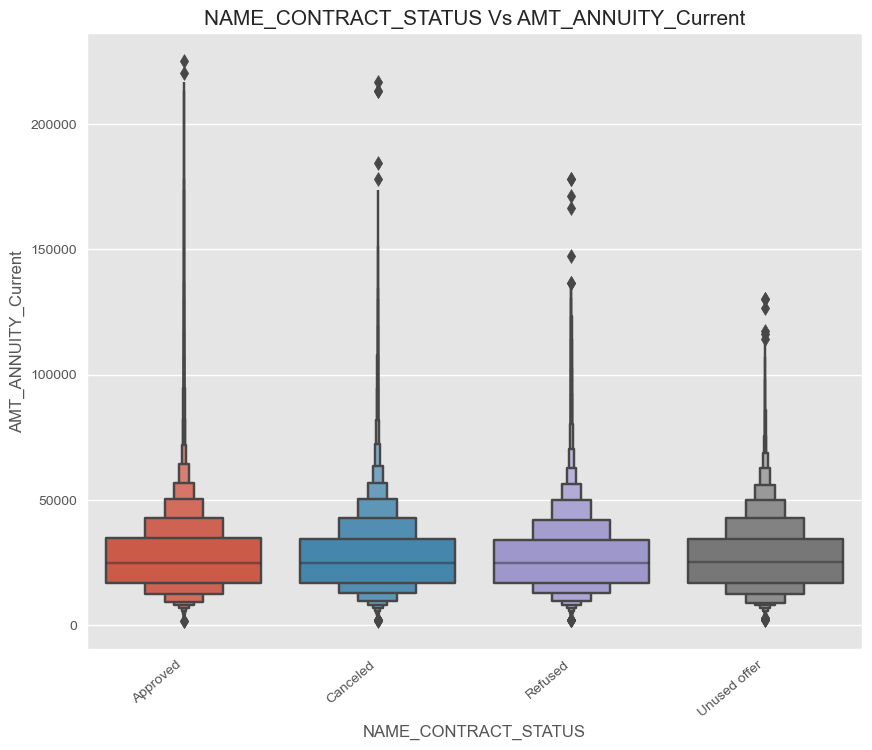

In [120]:
cat_vs_number('NAME_CONTRACT_STATUS', 'AMT_ANNUITY_Current')

**Insights**

- The highest number of refused cases is associated with AMT_CREDIT_Previous, while AMT_CREDIT_Current shows similarity across all four cases.
- The duration spent on unused offers surpasses that in other categories.
- Nuclear families (composed of 2-3 people) attain the highest approval rates.
- Previously, a majority of applications were either cancelled or refused.
- Currently, Refused/Cancelled/Approved/Unused all four have similar situation for AMT_ANNUITY.
- Previously, a majority of applications were either cancelled or refused,but in the current scenario for AMT_GOODS_PRICE indicates a similar distribution among Refused, Cancelled, Approved, and Unused categories.
- Yet, the present situation for AMT_ANNUITY reflects a comparable distribution among Refused, Cancelled, Approved, and Unused categories.

### CONCLUSION

Main variable for Application dataset - **TARGET** 

Main variable for Previous dataset -  **NAME_CONTRACT_STATUS**

Key factors to prioritize in predicting loans:

- NAME_EDUCATION_TYPE
- AMT_INCOME_TOTAL
- DAYS_BIRTH
- AMT_CREDIT
- DAYS_EMPLOYED
- AMT_ANNUITY
- NAME_INCOME_TYPE
- CODE_GENDER
- NAME_HOUSING_TYPE


**Key Inferences from the analysis**

Considering the afore-mentioned variables is crucial in the approval process to mitigate the risk of potential losses.
Banks should target more on women as they are less defaulter than men and make payments on time.
Banks should avoid giving loans to middle-aged men as there are riskier in becoming defaulter and can focus on middle-aged women.
They could target the population with academician degree as they have highest income level than other education level population.